In [1]:
import os
os.chdir( "../")

In [2]:
import psutil
num_cpus = psutil.cpu_count(logical=False)
num_cpus 


8

In [3]:
import pandas as pd
import numpy as np

path = "Dataset/data_train.csv"
df = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserID', 'ItemID', 'Interaction'])


df

,UserID,ItemID,Interaction
0,1,15,1.0
1,1,16,1.0
2,1,133,1.0
3,1,161,1.0
4,1,187,1.0
...,...,...,...
478724,13024,13605,1.0
478725,13024,13823,1.0
478726,13024,15122,1.0
478727,13024,18185,1.0


In [4]:
user_ids = df["UserID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
item_ids = df["ItemID"].unique().tolist()
item2item_encoded = {x: i for i, x in enumerate(item_ids)}
item_encoded2item = {i: x for i, x in enumerate(item_ids)}
df["User"] = df["UserID"].map(user2user_encoded)
df["Item"] = df["ItemID"].map(item2item_encoded)

num_users = len(user2user_encoded)
num_items = len(item_encoded2item)
df["Interaction"] = df["Interaction"].values.astype(np.float32)

# min and max ratings will be used to normalize the ratings later
min_rating = 0.0
max_rating = max(df["Interaction"])

print(
    "Number of users: {}, Number of Items: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_items, min_rating, max_rating
    )
)

Number of users: 12638, Number of Items: 22222, Min rating: 0.0, Max rating: 1.0


In [5]:
userId_unique = df["UserID"].unique()
itemId_unique = df["ItemID"].unique()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import scipy.sparse as sps
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

seeds = [
    1811854, 3772146, 6407100, 6926227, 1340378, 
    68679, 3822303, 4058970, 1264160, 1100338, 
    6552126, 725363, 8362134, 9446122, 5256199, 
    4686339, 3830906, 7315366, 9428914, 5564236, 
    3420043, 9223036, 851434, 3300082, 7899660, 
    2053768, 4305274, 3709256, 8795594, 1418903, 
    7428566, 157832
]

seeds = seeds[:num_cpus]

urm_all = sps.coo_matrix((df["Interaction"].values, 
                          (df["User"].values, df["Item"].values)))

urm_train_validation = []
urm_test = []
urm_train = []
urm_validation = []

for i in range(len(seeds)):
    a, b = split_train_in_two_percentage_global_sample(urm_all, train_percentage = 0.80,seed=seeds[i])
    c, d = split_train_in_two_percentage_global_sample(a, train_percentage = 0.80,seed=seeds[i])
    urm_train_validation.append(a)
    urm_test.append(b)
    urm_train.append(c)
    urm_validation.append(d)



In [7]:
num_users = len(userId_unique)
num_items = len(itemId_unique)

In [8]:
from Recommenders.Recommender_import_list import *
from Evaluation.Evaluator import EvaluatorHoldout

evaluator_validation = []
for u in urm_validation:
    evaluator_validation.append(EvaluatorHoldout(u, cutoff_list=[10], ignore_users=[]))

2024-01-08 00:19:38.684906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-08 00:19:38.684978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


EvaluatorHoldout: Ignoring 2565 (20.3%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2625 (20.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2596 (20.5%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2666 (21.1%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2621 (20.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2652 (21.0%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2570 (20.3%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2646 (20.9%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users


In [9]:
from Evaluation.Evaluator import EvaluatorHoldout
evaluator_test = []
for u in urm_test:
    evaluator_test.append(EvaluatorHoldout(u, cutoff_list=[10], ignore_users=[]))

EvaluatorHoldout: Ignoring 2166 (17.1%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2150 (17.0%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2190 (17.3%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2194 (17.4%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2165 (17.1%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2145 (17.0%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2171 (17.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2198 (17.4%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users


In [ ]:
0.05018798797659525

In [10]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender

score=0
for i in range(len(seeds)):
    rec = MultiThreadSLIM_SLIMElasticNetRecommender(urm_train_validation[i])
    rec.fit(workers=12, **{'topK': 638, 'l1_ratio': 0.026639245044358113, 'alpha': 0.001535792379351249})

    score += evaluator_test[i].evaluateRecommender(rec)[0]["MAP"].item()

score = score / len(seeds)
score

SLIMElasticNetRecommender: URM Detected 229 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 126 ( 0.6%) items with no interactions.


100%|█████████▉| 22216/22222 [00:59<00:00, 375.80it/s]


EvaluatorHoldout: Processed 10472 (100.0%) in 6.20 sec. Users per second: 1688
SLIMElasticNetRecommender: URM Detected 217 ( 1.7%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 113 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:39<00:00, 559.51it/s]


EvaluatorHoldout: Processed 10488 (100.0%) in 4.22 sec. Users per second: 2484
SLIMElasticNetRecommender: URM Detected 223 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 106 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 619.96it/s]


EvaluatorHoldout: Processed 10448 (100.0%) in 4.39 sec. Users per second: 2381
SLIMElasticNetRecommender: URM Detected 227 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 109 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 624.39it/s]


EvaluatorHoldout: Processed 10444 (100.0%) in 4.24 sec. Users per second: 2465
SLIMElasticNetRecommender: URM Detected 243 ( 1.9%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 122 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 621.52it/s]


EvaluatorHoldout: Processed 10473 (100.0%) in 4.36 sec. Users per second: 2404
SLIMElasticNetRecommender: URM Detected 239 ( 1.9%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 109 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 624.12it/s]


EvaluatorHoldout: Processed 10493 (100.0%) in 4.36 sec. Users per second: 2407
SLIMElasticNetRecommender: URM Detected 201 ( 1.6%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 114 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 623.13it/s]


EvaluatorHoldout: Processed 10467 (100.0%) in 4.27 sec. Users per second: 2453
SLIMElasticNetRecommender: URM Detected 220 ( 1.7%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 118 ( 0.5%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 619.19it/s]


EvaluatorHoldout: Processed 10440 (100.0%) in 4.45 sec. Users per second: 2344


0.049365276202757234

In [10]:
import os

output_folder_path = "result_experiments_more_data/"

# If directory does not exist, create
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
    
n_cases = 1000  # using 10 as an example
n_random_starts = int(n_cases*0.3)
metric_to_optimize = "MAP"   
cutoff_to_optimize = 10

In [11]:
from HyperparameterTuning.SearchAbstractClass import SearchInputRecommenderArgs
from HyperparameterTuning.SearchBayesianSkopt import SearchBayesianSkopt

from HyperparameterTuning.run_hyperparameter_search import runHyperparameterSearch_Collaborative, runHyperparameterSearch_Content
from Recommenders.NonPersonalizedRecommender import TopPop, Random
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender, MultiThreadSLIM_SLIMElasticNetRecommender
import os, multiprocessing
from functools import partial
from skopt.space import Real, Integer, Categorical


In [12]:
earlystopping_keywargs = {"validation_every_n": 5,
                          "stop_on_validation": True,
                          "evaluator_object": evaluator_validation,
                          "lower_validations_allowed": 5,
                          "validation_metric": metric_to_optimize,
                          }

In [13]:
from concurrent.futures import ProcessPoolExecutor
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
import time
from Recommenders.Incremental_Training_Early_Stopping import Incremental_Training_Early_Stopping

In [14]:
n_points = 10000
n_jobs = 1  # Using all available CPUs
acq_func = 'gp_hedge'
acq_optimizer = 'auto'
verbose = True
n_restarts_optimizer = 10
xi = 0.01
kappa = 1.96
x0 = None
y0 = None
noise = 1e-5
random_state = int(os.getpid() + time.time()) % np.iinfo(int).max
model_counter=0

In [15]:
from Recommenders.MatrixFactorization.ImplicitIALSRecommender import ImplicitALSRecommender

recommenderClass = NMFRecommender

hyperparameters_range_dictionary = {
        "topK": Integer(5, 300),
        "alpha": Real(low = 0.2651626829923486, high = 0.37644615066224263, prior = 'uniform'),
        "beta": Real(low = 0, high = 1.35, prior = 'uniform'),
        "normalize_similarity": Categorical([True, False]),
        #"implicit" : Categorical([True])
}

hyperparameters_range_dictionary = {
    "topK": Integer(5, 1000),
    "l1_ratio": Real(low = 1e-5, high = 1.0, prior = 'log-uniform'),
    "alpha": Real(low = 1e-3, high = 1.0, prior = 'uniform'),
}

#IALS
#hyperparameters_range_dictionary = {
#                "num_factors": Integer(1, 500),
#                "epochs": Integer(50,2500),
#                "confidence_scaling": Categorical(["linear", "log"]),
#                "alpha": Real(low = 1e-3, high = 50.0, prior = 'log-uniform'),
#                "epsilon": Real(low = 1e-3, high = 10.0, prior = 'log-uniform'),
#                "reg": Real(low = 1e-5, high = 1e-2, prior = 'log-uniform'),
#            }

hyperparameters_range_dictionary = {
                "num_factors": Integer(1, 350),
                "solver": Categorical(["coordinate_descent", "multiplicative_update"]),
                "init_type": Categorical(["random", "nndsvda"]),
                "beta_loss": Categorical(["frobenius", "kullback-leibler"]),
            }

hyperparameters_range_dictionary

{'topK': Integer(low=5, high=1000, prior='uniform', transform='identity'),
 'l1_ratio': Real(low=1e-05, high=1.0, prior='log-uniform', transform='identity'),
 'alpha': Real(low=0.001, high=1.0, prior='uniform', transform='identity')}

In [16]:
if issubclass(recommenderClass, Incremental_Training_Early_Stopping):
    print("Using EarlyStop")

In [19]:
from concurrent.futures import ProcessPoolExecutor
import os

import multiprocessing
from skopt import dump
from skopt.callbacks import CheckpointSaver

# Define a function to save your optimization after every `n` calls
def checkpoint_saver(n_calls=10, checkpoint_path="checkpoint.pkl"):
    return CheckpointSaver(checkpoint_path, compress=9) # keyword arguments will be passed to `skopt.dump`

print(f"RUNNING ON {num_cpus} threads")

sum_map = lambda results: sum(item[metric_to_optimize] for item in results)

hyperparams = dict()
hyperparams_names = list()
hyperparams_values = list()

skopt_types = [Real, Integer, Categorical]

for name, hyperparam in hyperparameters_range_dictionary.items():
    if any(isinstance(hyperparam, sko_type) for sko_type in skopt_types):
        hyperparams_names.append(name)
        hyperparams_values.append(hyperparam)
        hyperparams[name] = hyperparam

columns = ["Fold",metric_to_optimize]
for h in hyperparams_names:
    columns.append(h)

fold_results_df = pd.DataFrame(columns=columns)
if os.path.exists(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_folds_results.csv"):
    fold_results_df = pd.read_csv(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_folds_results.csv")


def run_fold(fold, **hyperparams):
    # Fit the model on this fold and return the evaluation metric
    # ...
    recommender = recommenderClass(urm_train_validation[fold], verbose=True)
    epochs = -1
    if issubclass(recommenderClass, ImplicitALSRecommender):
        recommender.fit(
            use_gpu=True,
            num_threads=1,
            **hyperparams
        )

    elif issubclass(recommenderClass, Incremental_Training_Early_Stopping):
        ea_args = {**earlystopping_keywargs}
        ea_args["evaluator_object"] = ea_args["evaluator_object"][fold]
        recommender.fit(**hyperparams, **ea_args)
        epochs = recommender.get_early_stopping_final_epochs_dict()["epochs"]
    else:
        recommender.fit(**hyperparams)

    result, _ = evaluator_test[fold].evaluateRecommender(recommender)
    metric_result = result[metric_to_optimize].item()
    
    print(f"Fold {fold}: hyperparams {hyperparams}, ended with {metric_to_optimize} {metric_result}")

    return {'Fold': fold, metric_to_optimize: metric_result, 'epochs': epochs, **hyperparams}

def run_fold_wrapper(fold, hyperparameters):
    return run_fold(fold, **hyperparameters)


def evaluate_model(hyperparams):

    global fold_results_df

    current_fit_hyperparameters_dict = dict(zip(hyperparams_names, hyperparams))

    if issubclass(recommenderClass, ImplicitALSRecommender):
        fold_results=[]
        for i, seed in  enumerate(seeds):
            fold_results.append(run_fold(i, **current_fit_hyperparameters_dict))
    else:
        # Start the process pool
        with ProcessPoolExecutor(max_workers=num_cpus) as executor:
            # Submit all tasks to the process pool and wait for them to complete
            #fold_results = list(executor.map(lambda fold: run_fold(fold, **current_fit_hyperparameters_dict), range(len(seeds))))
            fold_results = list(executor.map(run_fold_wrapper, range(len(seeds)), [current_fit_hyperparameters_dict]*len(seeds)))


    print(fold_results)
    for res in fold_results:
        fold_results_df = pd.concat([fold_results_df, pd.DataFrame([res])], ignore_index=True)
    fold_results_df.to_csv(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_folds_results.csv")

    # Compute average score across all folds
    average_score = sum_map(fold_results) / len(fold_results)

    print(f"Finished trial with Average {metric_to_optimize}: {average_score}")

    return -average_score  # Assuming a score that needs to be minimized




from skopt import load
checkpointPath = output_folder_path + recommenderClass.RECOMMENDER_NAME +"_checkpoint.pkl"

checkpoint_callback = checkpoint_saver(n_calls=1, checkpoint_path=checkpointPath)

if os.path.exists(checkpointPath):
    res = load(checkpointPath)
    #UNCOMMENT TO RESTART LAST CHECKPOINT
    x0 = res.x_iters
    y0 = res.func_vals
    model_counter = len(res.x_iters)
    res.fun

print(f"Still need to run {n_cases - model_counter} trials")

result = gp_minimize(evaluate_model, hyperparams_values,
                     base_estimator=None,
                     n_calls=max(0, n_cases - model_counter),
                     n_initial_points= max(0, n_random_starts - model_counter),
                     initial_point_generator = "random",
                     acq_func=acq_func,
                     acq_optimizer=acq_optimizer,
                     x0=x0,
                     y0=y0,
                     random_state=random_state,
                     verbose=verbose,
                     callback=[checkpoint_callback],
                     n_points=n_points,
                     n_restarts_optimizer=n_restarts_optimizer,
                     xi=xi,
                     kappa=kappa,
                     noise=noise,
                     n_jobs=1
                    )

RUNNING ON 8 threads
Still need to run 750 trials
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0117
Function value obtained: -0.0316
Current minimum: -0.0502
Iteration No: 2 started. Evaluating function at random point.
SLIMElasticNetRecommender: URM Detected 229 ( 1.8%) users with no interactions.SLIMElasticNetRecommender: URM Detected 239 ( 1.9%) users with no interactions.SLIMElasticNetRecommender: URM Detected 227 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 223 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 243 ( 1.9%) users with no interactions.SLIMElasticNetRecommender: URM Detected 217 ( 1.7%) users with no interactions.SLIMElasticNetRecommender: URM Detected 201 ( 1.6%) users with no interactions.




SLIMElasticNetRecommender: URM Detected 220 ( 1.7%) users with no interactions.SLIMElasticNetRecommender: URM Detected 122 ( 0.5%) it

KeyboardInterrupt: 

SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.11 min. Items per second: 90.13
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.13 min. Items per second: 89.77
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.16 min. Items per second: 88.95
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.19 min. Items per second: 88.39
EvaluatorHoldout: Processed 10440 (100.0%) in 6.04 sec. Users per second: 1729
Fold 7: hyperparams {'topK': 146, 'l1_ratio': 0.00045821086538866553, 'alpha': 0.220720155896855}, ended with MAP 0.03359663686675212
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.21 min. Items per second: 87.91
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 4.22 min. Items per second: 87.68
EvaluatorHoldout: Processed 10444 (100.0%) in 5.91 sec. Users per second: 1767
Fold 3: hyperparams {'topK': 146, 'l1_ratio': 0.00045821086538866553, 'alpha': 0.220720155896855}, ended with MAP 0.034659544783061144
SLIMElasticNetRecommender: Processed 22

In [22]:
import pandas as pd
#result = load(checkpointPath)
results_df = pd.DataFrame(result.x_iters, columns=[dim for dim in hyperparameters_range_dictionary])
results_df['score'] = result.func_vals

In [23]:
results_df['score'].min()

-0.050188270302236916

In [24]:
newdict = dict()
for key in results_df[results_df["score"] == results_df["score"].min()].drop(columns=["score"]):
    newdict[key] = results_df[results_df["score"] == results_df["score"].min()][key].item()
newdict

{'topK': 638, 'l1_ratio': 0.026639245044358113, 'alpha': 0.001535792379351249}

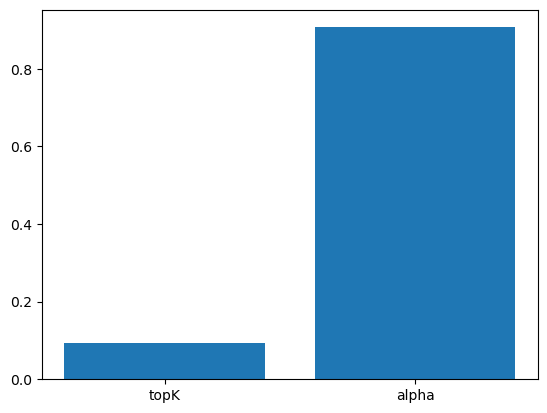

In [41]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


regr = RandomForestRegressor(max_depth=2)

result_df_graph = results_df.copy()
result_df_graph["score"] *= -1
#result_df_graph = result_df_graph.drop(columns=["l1_ratio"])

numerical_cols = result_df_graph.mean().notna()
numerical_cols = numerical_cols.index[numerical_cols]

numerical_df = result_df_graph[numerical_cols]
numerical_df = (numerical_df - numerical_df.mean())/(numerical_df.std() +1e-6)

y_train = numerical_df["score"]
X_train = numerical_df.copy()
X_train = X_train.drop(columns=["score"])

regr.fit(X_train, y_train)

plt.bar(X_train.columns, regr.feature_importances_)
plt.show() 

In [ ]:
recommenderClass = SLIMElasticNetRecommender

# topK: 1000 -> 0.030356337396325435 ... {'topK': 1000, 'l1_ratio': 0.0628176656639096, 'alpha': 0.001}
#topK = 775 -> 0.030390438261721445 ... {'topK': 775, 'l1_ratio': 0.05477307192674328, 'alpha': 0.001}


In [ ]:
SLIMEN = {'topK': 530, 'l1_ratio': 0.05017569359096808, 'alpha': 0.001}
P3ALPHA = {'topK': 400, 'alpha': 1.6632815179401539, 'normalize_similarity': True}
RP3 = {'topK': 71, 'alpha': 0.31274648571776065, 'beta': 0.3586324430664178, 'normalize_similarity': True}

SLIMEN_KFOLD = {'topK': 775, 'l1_ratio': 0.05477307192674328, 'alpha': 0.001}

RP3_KFOLD = {'topK': 45,
 'alpha': 0.37644615066224263,
 'beta': 0.13476759860236606,
 'normalize_similarity': True}
IMPLICIT_IALS = {'num_factors': 128,
 'epochs': 478,
 'confidence_scaling': 'linear',
 'alpha': 3.358295366834473,
 'epsilon': 7.295986722921583,
 'reg': 6.292360640597378e-05}

In [ ]:
#BEST 100 SINGLE SPLIT: 0.030123825632990115
OLD_BEST_PARAMS = {'topK': 34, 'alpha': 0.37644615066224263, 'beta': 0.16604377135619697, 'normalize_similarity': True}

# 0.030008733292970144
OLD_BEST_PARAMS = {'topK': 59,
 'alpha': 0.3764461506622426,
 'beta': 0.10277510174112,
 'normalize_similarity': True}

#0.030128708347317946
OLD_BEST_PARAMS = {'topK': 34,
 'alpha': 0.28453879172230406,
 'beta': 0.15344052347036438,
 'normalize_similarity': True}

In [42]:
import gc
gc.collect()

25432

In [162]:
from Recommenders.MatrixFactorization.ImplicitIALSRecommender import ImplicitALSRecommender

recommenderClass = RP3betaRecommender

hyperparameters_range_dictionary = {
                "topK": Integer(20, 40),
                "alpha": Real(low = 0.31123455963585706, high = 0.3883870594580194, prior = 'uniform'),
                "beta": Real(low = 0.12652809065246665, high = 0.20161226524439782, prior = 'uniform'),
                "normalize_similarity": Categorical([True, False]),
            }



hyperparameters_range_dictionary

{'topK': Integer(low=20, high=40, prior='uniform', transform='identity'),
 'alpha': Real(low=0.31123455963585706, high=0.3883870594580194, prior='uniform', transform='identity'),
 'beta': Real(low=0.12652809065246665, high=0.20161226524439782, prior='uniform', transform='identity'),
 'normalize_similarity': Categorical(categories=(True, False), prior=None)}

In [163]:
n_points = 10000
n_jobs = 1  # Using all available CPUs
acq_func = 'gp_hedge'
acq_optimizer = 'auto'
verbose = True
n_restarts_optimizer = 10
xi = 0.01
kappa = 1.96
x0 = None
y0 = None
noise = 1e-5
random_state = int(os.getpid() + time.time()) % np.iinfo(int).max
model_counter=0

In [258]:
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import multiprocessing
from skopt import dump
from skopt.callbacks import CheckpointSaver

# Define a function to save your optimization after every `n` calls
def checkpoint_saver(n_calls=10, checkpoint_path="checkpoint.pkl"):
    return CheckpointSaver(checkpoint_path, compress=9) # keyword arguments will be passed to `skopt.dump`


print(f"RUNNING ON {num_cpus} threads")

sum_map = lambda results: sum(item[metric_to_optimize] for item in results)

hyperparams = dict()
hyperparams_names = list()
hyperparams_values = list()

skopt_types = [Real, Integer, Categorical]

for name, hyperparam in hyperparameters_range_dictionary.items():
    if any(isinstance(hyperparam, sko_type) for sko_type in skopt_types):
        hyperparams_names.append(name)
        hyperparams_values.append(hyperparam)
        hyperparams[name] = hyperparam

columns = ["Fold",metric_to_optimize]
for h in hyperparams_names:
    columns.append(h)

fold_results_df = pd.DataFrame(columns=columns)
if os.path.exists(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_stricter_folds_results.csv"):
    fold_results_df = pd.read_csv(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_stricter_folds_results.csv")


fold_results_optuna_df = pd.DataFrame(columns=columns)
if os.path.exists(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_optuna_stricter_folds_results.csv"):
    fold_results_optuna_df = pd.read_csv(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_optuna_stricter_folds_results.csv")


def run_fold(fold, **hyperparams):
    # Fit the model on this fold and return the evaluation metric
    # ...
    recommender = recommenderClass(urm_train_validation[fold], verbose=True)
    epochs = -1
    if issubclass(recommenderClass, ImplicitALSRecommender):
        recommender.fit(
            use_gpu=True,
            num_threads=1,
            **hyperparams
        )

    elif issubclass(recommenderClass, Incremental_Training_Early_Stopping):
        ea_args = {**earlystopping_keywargs}
        ea_args["evaluator_object"] = ea_args["evaluator_object"][fold]
        recommender.fit(**hyperparams, **ea_args)
        epochs = recommender.get_early_stopping_final_epochs_dict()["epochs"]
    else:
        recommender.fit(**hyperparams)

    result, _ = evaluator_test[fold].evaluateRecommender(recommender)
    metric_result = result[metric_to_optimize].item()
    
    print(f"Fold {fold}: hyperparams {hyperparams}, ended with {metric_to_optimize} {metric_result}")

    return {'Fold': fold, metric_to_optimize: metric_result, 'epochs': epochs, **hyperparams}

def run_fold_wrapper(fold, hyperparameters):
    return run_fold(fold, **hyperparameters)


def evaluate_model(hyperparams):

    global fold_results_df

    current_fit_hyperparameters_dict = dict(zip(hyperparams_names, hyperparams))

    if issubclass(recommenderClass, ImplicitALSRecommender):
        fold_results=[]
        for i, seed in  enumerate(seeds):
            fold_results.append(run_fold(i, **current_fit_hyperparameters_dict))
    else:
        # Start the process pool
        with ProcessPoolExecutor(max_workers=num_cpus) as executor:
            # Submit all tasks to the process pool and wait for them to complete
            #fold_results = list(executor.map(lambda fold: run_fold(fold, **current_fit_hyperparameters_dict), range(len(seeds))))
            fold_results = list(executor.map(run_fold_wrapper, range(len(seeds)), [current_fit_hyperparameters_dict]*len(seeds)))


    print(fold_results)
    for res in fold_results:
        fold_results_df = pd.concat([fold_results_df, pd.DataFrame([res])], ignore_index=True)
    fold_results_df.to_csv(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_stricter_folds_results.csv")

    # Compute average score across all folds
    average_score = sum_map(fold_results) / len(fold_results)

    print(f"Finished trial with Average {metric_to_optimize}: {average_score}")

    return -average_score  # Assuming a score that needs to be minimized

import optuna
def optuna_evaluate_model(trial):

    global fold_results_optuna_df

    current_fit_hyperparameters_dict = {
        
        "topK": trial.suggest_int("topK", 5, 50),
        "alpha": trial.suggest_float("alpha",0, 1),
        "beta": trial.suggest_float("beta", 0, 1),
        "normalize_similarity": trial.suggest_categorical("normalize_similarity", [True])
            
    }

    if issubclass(recommenderClass, ImplicitALSRecommender):
        fold_results=[]
        for i, seed in  enumerate(seeds):
            fold_results.append(run_fold(i, **current_fit_hyperparameters_dict))
    else:
        # Start the process pool
        with ProcessPoolExecutor(max_workers=num_cpus) as executor:
            # Submit all tasks to the process pool and wait for them to complete
            #fold_results = list(executor.map(lambda fold: run_fold(fold, **current_fit_hyperparameters_dict), range(len(seeds))))
            fold_results = list(executor.map(run_fold_wrapper, range(len(seeds)), [current_fit_hyperparameters_dict]*len(seeds)))


    print(fold_results)
    for res in fold_results:
        fold_results_optuna_df = pd.concat([fold_results_optuna_df, pd.DataFrame([res])], ignore_index=True)
    fold_results_optuna_df.to_csv(output_folder_path + recommenderClass.RECOMMENDER_NAME + "_optuna_stricter_folds_results.csv")

    # Compute average score across all folds
    average_score = sum_map(fold_results) / len(fold_results)

    print(f"Finished trial with Average {metric_to_optimize}: {average_score}")

    return -average_score  # Assuming a score that needs to be minimized


from skopt import load
import skopt
checkpointPath = output_folder_path + recommenderClass.RECOMMENDER_NAME +"_stricter_checkpoint.pkl"
optuna_checkpointPath = output_folder_path + recommenderClass.RECOMMENDER_NAME +"_optuna_stricter_checkpoint.pkl"


checkpoint_callback = checkpoint_saver(n_calls=1, checkpoint_path=checkpointPath)

def optuna_checkpoint_saver(study,trial):
    """Save the study to a pickle file after each trial."""
    with open(optuna_checkpointPath, 'wb') as f:
        pickle.dump(study, f)

def print_stats(study, trial):
    best_score = study.best_value
    print(f"Best score so far: {best_score}")

    # Print the score of the current trial
    current_score = trial.value
    print(f"Score of current trial: {current_score}")

if os.path.exists(checkpointPath):
    res = skopt.load(checkpointPath)
    #UNCOMMENT TO RESTART LAST CHECKPOINT
    x0 = res.x_iters
    y0 = res.func_vals
    model_counter = len(res.x_iters)
    res.fun

study = optuna.create_study(direction='minimize')
if os.path.exists(optuna_checkpointPath):
    with open(optuna_checkpointPath, 'rb') as f:
        study = pickle.load(f)
    

print(f"Still need to run {n_cases - model_counter} trials on SKOPT")
print(f"Still need to run {n_cases - len(study.trials)} trials on OPTUNA")

study.enqueue_trial({'topK': 29,
 'alpha': 0.33723025040409343,
 'beta': 0.15542352567862933,
 'normalize_similarity': True}, skip_if_exists=True)

study.optimize(optuna_evaluate_model, n_trials=max(0, n_cases - len(study.trials)), callbacks=[optuna_checkpoint_saver,print_stats])


#result = gp_minimize(evaluate_model, hyperparams_values,
#                     base_estimator=None,
#                     n_calls=max(0, n_cases - model_counter),
#                     n_initial_points= max(0, n_random_starts - model_counter),
#                     initial_point_generator = "random",
#                     acq_func=acq_func,
#                     acq_optimizer=acq_optimizer,
#                     x0=x0,
#                     y0=y0,
#                     random_state=random_state,
#                     verbose=verbose,
#                     callback=[checkpoint_callback],
#                     n_points=n_points,
#                     n_restarts_optimizer=n_restarts_optimizer,
#                     xi=xi,
#                     kappa=kappa,
#                     noise=noise,
#                     n_jobs=1
#                    )



[I 2024-01-04 20:11:49,881] A new study created in memory with name: no-name-e244a200-7356-4f50-876e-b97b189ae278


[I 2024-01-04 20:11:49,895] Trial with params {'topK': 29, 'alpha': 0.33723025040409343, 'beta': 0.15542352567862933, 'normalize_similarity': True} already exists. Skipping enqueue.


RUNNING ON 8 threads
Still need to run 583 trials on SKOPT
Still need to run 745 trials on OPTUNA
RP3betaRecommender: URM Detected 229 ( 1.8%) users with no interactions.RP3betaRecommender: URM Detected 220 ( 1.7%) users with no interactions.RP3betaRecommender: URM Detected 239 ( 1.9%) users with no interactions.RP3betaRecommender: URM Detected 243 ( 1.9%) users with no interactions.RP3betaRecommender: URM Detected 217 ( 1.7%) users with no interactions.RP3betaRecommender: URM Detected 223 ( 1.8%) users with no interactions.RP3betaRecommender: URM Detected 227 ( 1.8%) users with no interactions.RP3betaRecommender: URM Detected 201 ( 1.6%) users with no interactions.







RP3betaRecommender: URM Detected 113 ( 0.5%) items with no interactions.RP3betaRecommender: URM Detected 109 ( 0.5%) items with no interactions.RP3betaRecommender: URM Detected 122 ( 0.5%) items with no interactions.

RP3betaRecommender: URM Detected 106 ( 0.5%) items with no interactions.RP3betaRecommender: URM Dete

[I 2024-01-04 20:11:57,033] Trial 255 finished with value: -0.04866343138645021 and parameters: {'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048453142620685376, 'epochs': -1, 'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04879659520177326, 'epochs': -1, 'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048397308515034855, 'epochs': -1, 'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04848537247785705, 'epochs': -1, 'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04940927843176548, 'epochs': -1, 'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048452891496826196, 'epochs': -1, 'topK': 29, 'alpha': 0.29300540152116983, 'beta': 0.16689601318563194, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048735553614459345, 'epochs': -1, 'topK

[I 2024-01-04 20:12:04,290] Trial 256 finished with value: -0.04859758187211432 and parameters: {'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04842372176143256, 'epochs': -1, 'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04900539770319586, 'epochs': -1, 'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048328673065704576, 'epochs': -1, 'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048393962813008055, 'epochs': -1, 'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04953884440564558, 'epochs': -1, 'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04827951438525214, 'epochs': -1, 'topK': 29, 'alpha': 0.2943045452046365, 'beta': 0.19303206744090048, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048563243360463894, 'epochs': -1, 'topK': 29, 

[I 2024-01-04 20:12:11,304] Trial 257 finished with value: -0.048432019823144504 and parameters: {'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04828531791504544, 'epochs': -1, 'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04861542821425616, 'epochs': -1, 'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845120733975124, 'epochs': -1, 'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04806054057011601, 'epochs': -1, 'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048720652047063454, 'epochs': -1, 'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04855218671858402, 'epochs': -1, 'topK': 27, 'alpha': 0.2571636451300452, 'beta': 0.10661476808219453, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04864636552369496, 'epochs': -1, 'topK': 27, 'a

[I 2024-01-04 20:12:18,539] Trial 258 finished with value: -0.04864058068117811 and parameters: {'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04843527183600789, 'epochs': -1, 'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048748127111257145, 'epochs': -1, 'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048394630855150216, 'epochs': -1, 'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04848609819262903, 'epochs': -1, 'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04941955807753645, 'epochs': -1, 'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04843950388694571, 'epochs': -1, 'topK': 29, 'alpha': 0.29855838905902293, 'beta': 0.1783206170017806, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048719103577229805, 'epochs': -1, 'topK': 29, 

[I 2024-01-04 20:12:25,770] Trial 259 finished with value: -0.048606399264254876 and parameters: {'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04827629536663218, 'epochs': -1, 'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048580494109670844, 'epochs': -1, 'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0485428744621897, 'epochs': -1, 'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048504727404814464, 'epochs': -1, 'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04932901914067829, 'epochs': -1, 'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04854701698335608, 'epochs': -1, 'topK': 28, 'alpha': 0.23657777691278012, 'beta': 0.16659382470333303, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04860691424749959, 'epochs': -1, 'topK': 

[I 2024-01-04 20:12:32,962] Trial 260 finished with value: -0.04860637351094517 and parameters: {'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04842706021802724, 'epochs': -1, 'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048635666763527645, 'epochs': -1, 'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04854777401006408, 'epochs': -1, 'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04843970564097034, 'epochs': -1, 'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049099922855294416, 'epochs': -1, 'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04860746166378559, 'epochs': -1, 'topK': 29, 'alpha': 0.27747298733059506, 'beta': 0.13510954672286876, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048713090726562255, 'epochs': -1, 'topK'

[I 2024-01-04 20:12:40,109] Trial 261 finished with value: -0.04857713213245737 and parameters: {'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048492162016322386, 'epochs': -1, 'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04898200740377588, 'epochs': -1, 'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0482748691934666, 'epochs': -1, 'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04825974357571516, 'epochs': -1, 'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049308872853703264, 'epochs': -1, 'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04831887547102515, 'epochs': -1, 'topK': 27, 'alpha': 0.31149475524060083, 'beta': 0.2046732505826718, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048673180714597225, 'epochs': -1, 'topK': 27, '

[I 2024-01-04 20:12:47,554] Trial 262 finished with value: -0.048383317273187273 and parameters: {'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048147603738465786, 'epochs': -1, 'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048568783825506445, 'epochs': -1, 'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048315846884951566, 'epochs': -1, 'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048064598493553566, 'epochs': -1, 'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048944223922740726, 'epochs': -1, 'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048531409450594316, 'epochs': -1, 'topK': 28, 'alpha': 0.2495575658944769, 'beta': 0.089375933128723, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048450352657862655, 'epochs': -1, 'topK': 28, 'alpha':

[I 2024-01-04 20:12:54,707] Trial 263 finished with value: -0.04857292803462695 and parameters: {'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04855823389962125, 'epochs': -1, 'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048720154855739065, 'epochs': -1, 'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845273417560028, 'epochs': -1, 'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04827643501547251, 'epochs': -1, 'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049177128186008855, 'epochs': -1, 'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04839991211072002, 'epochs': -1, 'topK': 26, 'alpha': 0.3890911377443693, 'beta': 0.16353845904343434, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04865646150183323, 'epochs': -1, 'topK': 26, '

[I 2024-01-04 20:13:01,700] Trial 264 finished with value: -0.04858668428627847 and parameters: {'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04844205485224475, 'epochs': -1, 'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04858213241436985, 'epochs': -1, 'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048501494172197145, 'epochs': -1, 'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04817262360708439, 'epochs': -1, 'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04919880145317045, 'epochs': -1, 'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048589611517278246, 'epochs': -1, 'topK': 29, 'alpha': 0.3521525283280157, 'beta': 0.14625056764087588, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04878439949592203, 'epochs': -1, 'topK': 29, '

[I 2024-01-04 20:13:08,630] Trial 265 finished with value: -0.04856245791798664 and parameters: {'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850568636545599, 'epochs': -1, 'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04871808143547324, 'epochs': -1, 'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048382628861907875, 'epochs': -1, 'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04834837196719686, 'epochs': -1, 'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04892856385050659, 'epochs': -1, 'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04854039881462993, 'epochs': -1, 'topK': 30, 'alpha': 0.288309848372774, 'beta': 0.12373607526191582, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048705451449075, 'epochs': -1, 'topK': 30, 'alpha': 0

[I 2024-01-04 20:13:15,557] Trial 266 finished with value: -0.01331205625417127 and parameters: {'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.013383732280791072, 'epochs': -1, 'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.01373665897836376, 'epochs': -1, 'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.013227191655120419, 'epochs': -1, 'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.013920485978126675, 'epochs': -1, 'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.012490425114315064, 'epochs': -1, 'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.013576341143528752, 'epochs': -1, 'topK': 29, 'alpha': 0.32142298307466843, 'beta': 0.8046860519630361, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.012824902452302825, 'epochs': -1, 'topK': 2

[I 2024-01-04 20:13:22,923] Trial 267 finished with value: -0.04853339304702377 and parameters: {'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048346429480884, 'epochs': -1, 'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048988360091049524, 'epochs': -1, 'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04822575597365085, 'epochs': -1, 'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0486266018918746, 'epochs': -1, 'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04924242079784981, 'epochs': -1, 'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04812497825458903, 'epochs': -1, 'topK': 31, 'alpha': 0.30326894824901557, 'beta': 0.183624552389689, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04847155686579662, 'epochs': -1, 'topK': 31, 'alpha': 0.

[I 2024-01-04 20:13:30,101] Trial 268 finished with value: -0.04059548601446574 and parameters: {'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04104661561594386, 'epochs': -1, 'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04037922402624969, 'epochs': -1, 'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04054450308709544, 'epochs': -1, 'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04060277640993905, 'epochs': -1, 'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.041267958120579665, 'epochs': -1, 'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04036571244019119, 'epochs': -1, 'topK': 28, 'alpha': 0.9973078535701837, 'beta': 0.16398775849564826, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.040549811880422795, 'epochs': -1, 'topK': 28, '

[I 2024-01-04 20:13:37,279] Trial 269 finished with value: -0.04851255247044887 and parameters: {'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04847670128657593, 'epochs': -1, 'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04900590849103491, 'epochs': -1, 'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04806685869855908, 'epochs': -1, 'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048240612822430945, 'epochs': -1, 'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04961279495725284, 'epochs': -1, 'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04825765551940212, 'epochs': -1, 'topK': 30, 'alpha': 0.26770609828141007, 'beta': 0.2239728744724652, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048349131283353664, 'epochs': -1, 'topK': 30, '

[I 2024-01-04 20:13:44,155] Trial 270 finished with value: -0.04864140334042394 and parameters: {'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048613074017486435, 'epochs': -1, 'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04881310689162581, 'epochs': -1, 'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04851122870026067, 'epochs': -1, 'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04836195917151563, 'epochs': -1, 'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049020239497180866, 'epochs': -1, 'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048587058795055135, 'epochs': -1, 'topK': 27, 'alpha': 0.3455728754724111, 'beta': 0.13805699209926692, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048830174501570865, 'epochs': -1, 'topK': 27,

[I 2024-01-04 20:13:51,362] Trial 271 finished with value: -0.04862503357111352 and parameters: {'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04849676234130092, 'epochs': -1, 'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04880194144782317, 'epochs': -1, 'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04839555379323809, 'epochs': -1, 'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048364231304676375, 'epochs': -1, 'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04940512186287113, 'epochs': -1, 'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04844173515525911, 'epochs': -1, 'topK': 28, 'alpha': 0.318878235737018, 'beta': 0.18401495150311636, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04861403033873721, 'epochs': -1, 'topK': 28, 'alpha':

[I 2024-01-04 20:13:58,733] Trial 272 finished with value: -0.04841755525850307 and parameters: {'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850037742369752, 'epochs': -1, 'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04853206007167745, 'epochs': -1, 'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048257952459953395, 'epochs': -1, 'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04807524484324626, 'epochs': -1, 'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04871678344465586, 'epochs': -1, 'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048433982443322726, 'epochs': -1, 'topK': 29, 'alpha': 0.36790241706806553, 'beta': 0.10376223740905953, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04867372285687055, 'epochs': -1, 'topK':

[I 2024-01-04 20:14:06,129] Trial 273 finished with value: -0.048614582807189645 and parameters: {'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048484412704476544, 'epochs': -1, 'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0486431961546384, 'epochs': -1, 'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04860740796446242, 'epochs': -1, 'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048397929547154696, 'epochs': -1, 'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04902959082993523, 'epochs': -1, 'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04859433499884337, 'epochs': -1, 'topK': 26, 'alpha': 0.3293522457250964, 'beta': 0.1556438875516919, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048725897416067074, 'epochs': -1, 'topK': 26, 'alpha'

[I 2024-01-04 20:14:13,181] Trial 274 finished with value: -0.048536341305681366 and parameters: {'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048376195175040354, 'epochs': -1, 'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048984171630768326, 'epochs': -1, 'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04818918787525266, 'epochs': -1, 'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04839271275981423, 'epochs': -1, 'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04944723317252757, 'epochs': -1, 'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838492857672376, 'epochs': -1, 'topK': 31, 'alpha': 0.2829426857140145, 'beta': 0.200603370609367, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048263279452732684, 'epochs': -1, 'topK': 31, 'alpha': 0.2

[I 2024-01-04 20:14:20,645] Trial 275 finished with value: -0.04850084915427224 and parameters: {'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04843616992251519, 'epochs': -1, 'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0485826242841409, 'epochs': -1, 'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048359361706653725, 'epochs': -1, 'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04820828621886713, 'epochs': -1, 'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04902646866697341, 'epochs': -1, 'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048401387016893345, 'epochs': -1, 'topK': 30, 'alpha': 0.23140830965130424, 'beta': 0.1246889891920762, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0487424536070286, 'epochs': -1, 'topK': 30, 'al

[I 2024-01-04 20:14:27,822] Trial 276 finished with value: -0.04865404687462015 and parameters: {'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04838363375653371, 'epochs': -1, 'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048712712487741755, 'epochs': -1, 'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04855023897639757, 'epochs': -1, 'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048498169374989464, 'epochs': -1, 'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049247293493928375, 'epochs': -1, 'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04844631114620694, 'epochs': -1, 'topK': 28, 'alpha': 0.30117284601255534, 'beta': 0.17005434817305465, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04875394095729491, 'epochs': -1, 'topK'

[I 2024-01-04 20:14:35,369] Trial 277 finished with value: -0.04862945693717066 and parameters: {'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04847472701201769, 'epochs': -1, 'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0487879004576666, 'epochs': -1, 'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845561313473885, 'epochs': -1, 'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04837353261233079, 'epochs': -1, 'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049271243969755095, 'epochs': -1, 'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04837367768988918, 'epochs': -1, 'topK': 27, 'alpha': 0.268478746019824, 'beta': 0.1816202622978968, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0487596239731528, 'epochs': -1, 'topK': 27, 'alpha': 0.26847

[I 2024-01-04 20:14:42,786] Trial 278 finished with value: -0.04859754650601395 and parameters: {'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04849199907235694, 'epochs': -1, 'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048921299323187825, 'epochs': -1, 'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048376905126522776, 'epochs': -1, 'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04827995340227319, 'epochs': -1, 'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04941916401813353, 'epochs': -1, 'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04842461111640625, 'epochs': -1, 'topK': 28, 'alpha': 0.2989309032023516, 'beta': 0.204583558642636, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04866407424088783, 'epochs': -1, 'topK': 28, 'alpha': 0.29

[I 2024-01-04 20:14:49,940] Trial 279 finished with value: -0.043886856677837524 and parameters: {'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.044174245455758814, 'epochs': -1, 'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0438218432554824, 'epochs': -1, 'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0437935490045946, 'epochs': -1, 'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04384409214981869, 'epochs': -1, 'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.044567803982728686, 'epochs': -1, 'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04365159917647356, 'epochs': -1, 'topK': 25, 'alpha': 0.8546446205291456, 'beta': 0.16996405965209055, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04389956492134831, 'epochs': -1, 'topK': 25, 'al

[I 2024-01-04 20:14:56,942] Trial 280 finished with value: -0.04769496576289893 and parameters: {'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04772242609164962, 'epochs': -1, 'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.047904842874094036, 'epochs': -1, 'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04754082196942139, 'epochs': -1, 'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04750731414102797, 'epochs': -1, 'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04800009927265796, 'epochs': -1, 'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04761605620678405, 'epochs': -1, 'topK': 27, 'alpha': 0.4993560999592664, 'beta': 0.06775632040773479, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04781137922510868, 'epochs': -1, 'topK': 27, 'a

[I 2024-01-04 20:15:04,154] Trial 281 finished with value: -0.0486756890898042 and parameters: {'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04854405777462576, 'epochs': -1, 'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04868064636228304, 'epochs': -1, 'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04860914749386284, 'epochs': -1, 'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048511008067213354, 'epochs': -1, 'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04905780396757262, 'epochs': -1, 'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048737756387857094, 'epochs': -1, 'topK': 29, 'alpha': 0.30270506343761255, 'beta': 0.1438477821708009, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04873794965583505, 'epochs': -1, 'topK': 29, '

[I 2024-01-04 20:15:11,204] Trial 282 finished with value: -0.04867133817938474 and parameters: {'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04852768380079387, 'epochs': -1, 'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04866124020800843, 'epochs': -1, 'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04867327080142987, 'epochs': -1, 'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048442376727277955, 'epochs': -1, 'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049068830052789475, 'epochs': -1, 'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048646153369064485, 'epochs': -1, 'topK': 29, 'alpha': 0.3069087184932896, 'beta': 0.1411325102067269, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04878383839762526, 'epochs': -1, 'topK': 29, 'alpha

[I 2024-01-04 20:15:18,777] Trial 283 finished with value: -0.04723989776784094 and parameters: {'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.047131792110784436, 'epochs': -1, 'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04738670725727408, 'epochs': -1, 'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.046779903194049996, 'epochs': -1, 'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047253815511906966, 'epochs': -1, 'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04779206622016762, 'epochs': -1, 'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04744757275825659, 'epochs': -1, 'topK': 29, 'alpha': 0.3502559062049559, 'beta': 0.3387557770656543, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04713006561817168, 'epochs': -1, 'topK': 29, 'alpha

[I 2024-01-04 20:15:26,191] Trial 284 finished with value: -0.04855561732039626 and parameters: {'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04858514239029017, 'epochs': -1, 'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048711562269200245, 'epochs': -1, 'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04844231219159497, 'epochs': -1, 'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04816594399153831, 'epochs': -1, 'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04883828256787361, 'epochs': -1, 'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04861550179333531, 'epochs': -1, 'topK': 28, 'alpha': 0.3096979776187306, 'beta': 0.11696493744776773, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048826515989027285, 'epochs': -1, 'topK': 28, '

[I 2024-01-04 20:15:33,846] Trial 285 finished with value: -0.04860763204702793 and parameters: {'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859938293499294, 'epochs': -1, 'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04846789376823762, 'epochs': -1, 'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04851455583509617, 'epochs': -1, 'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04830424394959137, 'epochs': -1, 'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04920449636934949, 'epochs': -1, 'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04849918842342432, 'epochs': -1, 'topK': 30, 'alpha': 0.33618722032121556, 'beta': 0.1375257616984844, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04877941785293526, 'epochs': -1, 'topK': 30, 'al

[I 2024-01-04 20:15:40,710] Trial 286 finished with value: -0.04641141612224582 and parameters: {'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04710517919288988, 'epochs': -1, 'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04656917051081881, 'epochs': -1, 'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04643236193150119, 'epochs': -1, 'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04638257783006023, 'epochs': -1, 'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0463288857667266, 'epochs': -1, 'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.046010613273551194, 'epochs': -1, 'topK': 13, 'alpha': 0.3912623737035916, 'beta': 0.10145276647219925, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04621715489800944, 'epochs': -1, 'topK': 13, 'al

[I 2024-01-04 20:15:48,503] Trial 287 finished with value: -0.044225100030129354 and parameters: {'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04430920095310901, 'epochs': -1, 'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0441634808639962, 'epochs': -1, 'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0439128472981848, 'epochs': -1, 'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04402747761302966, 'epochs': -1, 'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.044458069806108114, 'epochs': -1, 'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04445148617596978, 'epochs': -1, 'topK': 26, 'alpha': 0.29065225067421024, 'beta': 0.4745686590749126, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04412469803054552, 'epochs': -1, 'topK': 26, 'alp

[I 2024-01-04 20:15:55,972] Trial 288 finished with value: -0.04862224249011606 and parameters: {'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0485899283956015, 'epochs': -1, 'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04860248447205029, 'epochs': -1, 'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04855666536012107, 'epochs': -1, 'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0481966823816219, 'epochs': -1, 'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04914338306059947, 'epochs': -1, 'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04862625726296815, 'epochs': -1, 'topK': 29, 'alpha': 0.3589315802322468, 'beta': 0.142099853423878, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048824430826437726, 'epochs': -1, 'topK': 29, 'alpha': 0.35893

[I 2024-01-04 20:16:03,670] Trial 289 finished with value: -0.04864385535629323 and parameters: {'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845612108479836, 'epochs': -1, 'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04860151965057628, 'epochs': -1, 'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048635422743625756, 'epochs': -1, 'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0484223492793014, 'epochs': -1, 'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04914964254265375, 'epochs': -1, 'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04858210840484798, 'epochs': -1, 'topK': 28, 'alpha': 0.3190706803471324, 'beta': 0.15437500225210687, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04881196534535665, 'epochs': -1, 'topK': 28, 'al

[I 2024-01-04 20:16:11,181] Trial 290 finished with value: -0.04858856611421234 and parameters: {'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04861039870493728, 'epochs': -1, 'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048787828569007735, 'epochs': -1, 'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04840401595809389, 'epochs': -1, 'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048340753861867175, 'epochs': -1, 'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04897123593700569, 'epochs': -1, 'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048557919943606274, 'epochs': -1, 'topK': 31, 'alpha': 0.32563007308287767, 'beta': 0.11992437382187096, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04867126236501478, 'epochs': -1, 'topK'

[I 2024-01-04 20:16:18,618] Trial 291 finished with value: -0.048672517930923025 and parameters: {'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048633589799556926, 'epochs': -1, 'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04870937155691218, 'epochs': -1, 'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048610252740708904, 'epochs': -1, 'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04845808788215984, 'epochs': -1, 'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04894380334010877, 'epochs': -1, 'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04872494361320307, 'epochs': -1, 'topK': 27, 'alpha': 0.3023387964576394, 'beta': 0.140241697822302, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04888849839480453, 'epochs': -1, 'topK': 27, 'alpha': 0.30

[I 2024-01-04 20:16:26,232] Trial 292 finished with value: -0.048563877581003605 and parameters: {'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04844388891920481, 'epochs': -1, 'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048618144848837586, 'epochs': -1, 'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048685998231605555, 'epochs': -1, 'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048355952076988895, 'epochs': -1, 'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04886196781140988, 'epochs': -1, 'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0485031668882814, 'epochs': -1, 'topK': 26, 'alpha': 0.28849331980344434, 'beta': 0.15796739724943773, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04858336328385112, 'epochs': -1, 'topK':

[I 2024-01-04 20:16:33,695] Trial 293 finished with value: -0.048369284225752915 and parameters: {'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04814900581444766, 'epochs': -1, 'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048543793057523585, 'epochs': -1, 'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048328642680911575, 'epochs': -1, 'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04793174709562167, 'epochs': -1, 'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048818765260329924, 'epochs': -1, 'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0486856619454548, 'epochs': -1, 'topK': 27, 'alpha': 0.25096158165099963, 'beta': 0.0927374715217947, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04849684420120137, 'epochs': -1, 'topK': 27, '

[I 2024-01-04 20:16:40,879] Trial 294 finished with value: -0.04860272337554839 and parameters: {'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0486061470042569, 'epochs': -1, 'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04871926192292385, 'epochs': -1, 'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048509261284912786, 'epochs': -1, 'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04816790456128897, 'epochs': -1, 'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04884971786862421, 'epochs': -1, 'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04864504908033992, 'epochs': -1, 'topK': 27, 'alpha': 0.3019772348471325, 'beta': 0.1261138653953037, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04901137513060769, 'epochs': -1, 'topK': 27, 'alpha': 

[I 2024-01-04 20:16:47,943] Trial 295 finished with value: -0.04864383843933548 and parameters: {'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048386574326701105, 'epochs': -1, 'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048712152512925475, 'epochs': -1, 'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04846873556722385, 'epochs': -1, 'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04847037183953198, 'epochs': -1, 'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049418660076781584, 'epochs': -1, 'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048409907436401875, 'epochs': -1, 'topK': 28, 'alpha': 0.27737138528494754, 'beta': 0.17106360845395624, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048708946939816034, 'epochs': -1, 'top

[I 2024-01-04 20:16:55,514] Trial 296 finished with value: -0.04858032585422405 and parameters: {'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048438686080493565, 'epochs': -1, 'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04871903490610659, 'epochs': -1, 'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04835398739638832, 'epochs': -1, 'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04834663937067302, 'epochs': -1, 'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049294103204158425, 'epochs': -1, 'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838520464890482, 'epochs': -1, 'topK': 26, 'alpha': 0.3100482528338215, 'beta': 0.19385440930695413, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04860463194226505, 'epochs': -1, 'topK': 26, '

[I 2024-01-04 20:17:03,015] Trial 297 finished with value: -0.04859243350123979 and parameters: {'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04842535499048179, 'epochs': -1, 'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04861786864504305, 'epochs': -1, 'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04856927125112479, 'epochs': -1, 'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048393613254060205, 'epochs': -1, 'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049006477730339726, 'epochs': -1, 'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04854161277586477, 'epochs': -1, 'topK': 29, 'alpha': 0.26071656718849257, 'beta': 0.14226149445135544, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048625593513097705, 'epochs': -1, 'topK'

[I 2024-01-04 20:17:10,803] Trial 298 finished with value: -0.029710731497496083 and parameters: {'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.029766766555107006, 'epochs': -1, 'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.02941680893053913, 'epochs': -1, 'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.029598358613481247, 'epochs': -1, 'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.029898643103354116, 'epochs': -1, 'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.029940955503115537, 'epochs': -1, 'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.029598867120786698, 'epochs': -1, 'topK': 28, 'alpha': 0.9596307862003509, 'beta': 0.5269721885929437, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.030229458873769655, 'epochs': -1, 'topK': 28, 'al

[I 2024-01-04 20:17:18,140] Trial 299 finished with value: -0.04855317568388755 and parameters: {'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048412584730862816, 'epochs': -1, 'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04857384251692088, 'epochs': -1, 'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04867065770923016, 'epochs': -1, 'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048243378897583004, 'epochs': -1, 'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04874899780084608, 'epochs': -1, 'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04858027800846883, 'epochs': -1, 'topK': 25, 'alpha': 0.2987262688839282, 'beta': 0.15723638570239135, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048635617458346596, 'epochs': -1, 'topK': 25, 

[I 2024-01-04 20:17:25,969] Trial 300 finished with value: -0.04853473753827897 and parameters: {'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04865093764778709, 'epochs': -1, 'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04872097968350902, 'epochs': -1, 'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04831122839641271, 'epochs': -1, 'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04824561683475972, 'epochs': -1, 'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048959395209753905, 'epochs': -1, 'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048499161950749284, 'epochs': -1, 'topK': 32, 'alpha': 0.3392122770866413, 'beta': 0.11346125197832543, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048624243844221586, 'epochs': -1, 'topK': 32, 

[I 2024-01-04 20:17:33,512] Trial 301 finished with value: -0.04847402995711714 and parameters: {'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048352280306062465, 'epochs': -1, 'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04901795930042549, 'epochs': -1, 'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0480705998261996, 'epochs': -1, 'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048279497455819595, 'epochs': -1, 'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04950700137466182, 'epochs': -1, 'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0481600923669452, 'epochs': -1, 'topK': 30, 'alpha': 0.316331295582482, 'beta': 0.22731931826407895, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048293066948126274, 'epochs': -1, 'topK': 30, 'alpha':

[I 2024-01-04 20:17:41,060] Trial 302 finished with value: -0.04819459603568107 and parameters: {'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04794262780869989, 'epochs': -1, 'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048471064436454055, 'epochs': -1, 'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048037187948176366, 'epochs': -1, 'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0479207511869813, 'epochs': -1, 'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048861551017810596, 'epochs': -1, 'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048324423387323144, 'epochs': -1, 'topK': 27, 'alpha': 0.05551150269795502, 'beta': 0.17616392569555125, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04801783685991258, 'epochs': -1, 'topK'

[I 2024-01-04 20:17:48,468] Trial 303 finished with value: -0.04862373166648446 and parameters: {'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0483998334182164, 'epochs': -1, 'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048630986433475465, 'epochs': -1, 'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048628358279248905, 'epochs': -1, 'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0484550254418128, 'epochs': -1, 'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04897750299712545, 'epochs': -1, 'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04865752905565229, 'epochs': -1, 'topK': 28, 'alpha': 0.2754462773363428, 'beta': 0.14503994912416057, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048774792583191076, 'epochs': -1, 'topK': 28, 'a

[I 2024-01-04 20:17:55,786] Trial 304 finished with value: -0.048534787274511 and parameters: {'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04839402806577246, 'epochs': -1, 'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.049013165461964804, 'epochs': -1, 'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04817872791025592, 'epochs': -1, 'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0484003650611281, 'epochs': -1, 'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049276726700101775, 'epochs': -1, 'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04824674877734124, 'epochs': -1, 'topK': 29, 'alpha': 0.37140506569714865, 'beta': 0.19065197118084637, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04857193280165542, 'epochs': -1, 'topK': 

[I 2024-01-04 20:18:03,496] Trial 305 finished with value: -0.048660522678409195 and parameters: {'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04846843661707179, 'epochs': -1, 'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048941106540506554, 'epochs': -1, 'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048509857586475566, 'epochs': -1, 'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04851180217395355, 'epochs': -1, 'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04945478850377228, 'epochs': -1, 'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048326057129545796, 'epochs': -1, 'topK': 30, 'alpha': 0.32989052188872875, 'beta': 0.16469954210792215, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04862390642700254, 'epochs': -1, 'topK'

[I 2024-01-04 20:18:11,397] Trial 306 finished with value: -0.0479634685373339 and parameters: {'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04771158842324885, 'epochs': -1, 'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048205666642452134, 'epochs': -1, 'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04787376713702388, 'epochs': -1, 'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047617691178348714, 'epochs': -1, 'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04863849823961604, 'epochs': -1, 'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04804141914715704, 'epochs': -1, 'topK': 31, 'alpha': 0.007374162407178142, 'beta': 0.1287385342889368, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04792564234381444, 'epochs': -1, 'topK':

[I 2024-01-04 20:18:19,015] Trial 307 finished with value: -0.04863158043232336 and parameters: {'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048478739980841665, 'epochs': -1, 'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04877989054762572, 'epochs': -1, 'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048477349656044624, 'epochs': -1, 'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04836843361115757, 'epochs': -1, 'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049252374586806626, 'epochs': -1, 'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04840592518973412, 'epochs': -1, 'topK': 30, 'alpha': 0.35650968030011476, 'beta': 0.15538927465648422, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048647745522208866, 'epochs': -1, 'topK

[I 2024-01-04 20:18:26,591] Trial 308 finished with value: -0.048501889470581545 and parameters: {'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845596193022735, 'epochs': -1, 'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.049060770888574724, 'epochs': -1, 'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.047931984400447804, 'epochs': -1, 'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04851900992747489, 'epochs': -1, 'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04936575381290437, 'epochs': -1, 'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04821110899329773, 'epochs': -1, 'topK': 30, 'alpha': 0.3316382767947948, 'beta': 0.2109200721636822, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0483308425118406, 'epochs': -1, 'topK': 30, 'alpha':

[I 2024-01-04 20:18:33,742] Trial 309 finished with value: -0.04829417271682234 and parameters: {'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04817782794936216, 'epochs': -1, 'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04845694020679793, 'epochs': -1, 'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04829600941320945, 'epochs': -1, 'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047973808155970715, 'epochs': -1, 'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04859448104650124, 'epochs': -1, 'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04846030384579959, 'epochs': -1, 'topK': 29, 'alpha': 0.31494120327403224, 'beta': 0.08368422715832508, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0484103516569845, 'epochs': -1, 'topK': 2

[I 2024-01-04 20:18:41,425] Trial 310 finished with value: -0.047633183835329086 and parameters: {'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0479389028338616, 'epochs': -1, 'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04768192749385602, 'epochs': -1, 'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04742322522424035, 'epochs': -1, 'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04748270443119232, 'epochs': -1, 'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04814668179248597, 'epochs': -1, 'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04735638952045188, 'epochs': -1, 'topK': 32, 'alpha': 0.5998163671248696, 'beta': 0.11043953268258899, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.047714146197953146, 'epochs': -1, 'topK': 32, 'al

[I 2024-01-04 20:18:49,141] Trial 311 finished with value: -0.04861604100083125 and parameters: {'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048475268895437656, 'epochs': -1, 'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048974629357210114, 'epochs': -1, 'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048388234856219674, 'epochs': -1, 'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04845723678211311, 'epochs': -1, 'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04921715552766891, 'epochs': -1, 'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048362596984535995, 'epochs': -1, 'topK': 30, 'alpha': 0.3425095698739344, 'beta': 0.17049513172910327, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048570317748449686, 'epochs': -1, 'topK': 30

[I 2024-01-04 20:18:56,567] Trial 312 finished with value: -0.04858166051640746 and parameters: {'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04855731686614111, 'epochs': -1, 'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04881854394440274, 'epochs': -1, 'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048398998669146584, 'epochs': -1, 'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048208290018421016, 'epochs': -1, 'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04906589734146385, 'epochs': -1, 'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048500704929515304, 'epochs': -1, 'topK': 27, 'alpha': 0.3735770665364711, 'beta': 0.14002717182962754, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04877260126686956, 'epochs': -1, 'topK': 27, 

[I 2024-01-04 20:19:04,042] Trial 313 finished with value: -0.048607957542615654 and parameters: {'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04854457692167844, 'epochs': -1, 'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04902916636397818, 'epochs': -1, 'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04830144069496153, 'epochs': -1, 'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04828677740086279, 'epochs': -1, 'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04939488768549284, 'epochs': -1, 'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04839034034783645, 'epochs': -1, 'topK': 28, 'alpha': 0.3000454484718399, 'beta': 0.1953138510406418, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04864564519480026, 'epochs': -1, 'topK': 28, 'alpha': 

[I 2024-01-04 20:19:11,889] Trial 314 finished with value: -0.0459653352309427 and parameters: {'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.046148262335237784, 'epochs': -1, 'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04596593763999434, 'epochs': -1, 'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.046136733087824844, 'epochs': -1, 'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04599874310761019, 'epochs': -1, 'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04661488195647525, 'epochs': -1, 'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04571723552663298, 'epochs': -1, 'topK': 29, 'alpha': 0.7602301255232564, 'beta': 0.158355456721897, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04588478377243125, 'epochs': -1, 'topK': 29, 'alpha': 0.76

[I 2024-01-04 20:19:19,584] Trial 315 finished with value: -0.048571761620842965 and parameters: {'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859542680708718, 'epochs': -1, 'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04873283752860472, 'epochs': -1, 'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0486426847091573, 'epochs': -1, 'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04810403786179424, 'epochs': -1, 'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048987862212583645, 'epochs': -1, 'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04861722251720407, 'epochs': -1, 'topK': 31, 'alpha': 0.4029029502207665, 'beta': 0.1259890910425653, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04854014734138044, 'epochs': -1, 'topK': 31, 'alpha': 

[I 2024-01-04 20:19:27,212] Trial 316 finished with value: -0.04859212047741719 and parameters: {'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048437537893946114, 'epochs': -1, 'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.049062197310910736, 'epochs': -1, 'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04824573777315982, 'epochs': -1, 'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048491003416559465, 'epochs': -1, 'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049343038561744525, 'epochs': -1, 'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048318417871930315, 'epochs': -1, 'topK': 29, 'alpha': 0.32831915654387733, 'beta': 0.18919736085270028, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04858320784445816, 'epochs': -1, 'top

[I 2024-01-04 20:19:34,999] Trial 317 finished with value: -0.04862781815463918 and parameters: {'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04848329483308556, 'epochs': -1, 'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04863146316879217, 'epochs': -1, 'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04844501643817344, 'epochs': -1, 'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048405224690413216, 'epochs': -1, 'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049186797797511624, 'epochs': -1, 'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04850985691141103, 'epochs': -1, 'topK': 27, 'alpha': 0.34555422023820354, 'beta': 0.17050908514824534, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0488004173358149, 'epochs': -1, 'topK': 

[I 2024-01-04 20:19:42,599] Trial 318 finished with value: -0.0486239201907558 and parameters: {'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859164878072519, 'epochs': -1, 'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048648387272529695, 'epochs': -1, 'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04858314570723705, 'epochs': -1, 'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04839830190342516, 'epochs': -1, 'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04909937723458265, 'epochs': -1, 'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04862342090494251, 'epochs': -1, 'topK': 28, 'alpha': 0.31171691152429243, 'beta': 0.14043488136653723, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04871383001148038, 'epochs': -1, 'topK': 

[I 2024-01-04 20:19:49,975] Trial 319 finished with value: -0.04862032690624265 and parameters: {'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850418197582148, 'epochs': -1, 'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04879081005654295, 'epochs': -1, 'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04842309760810964, 'epochs': -1, 'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04837545518654368, 'epochs': -1, 'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04925490566066401, 'epochs': -1, 'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048409983072616014, 'epochs': -1, 'topK': 30, 'alpha': 0.361997416807935, 'beta': 0.1545410221089425, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048664385119673845, 'epochs': -1, 'topK': 30, 'alpha': 0.36

[I 2024-01-04 20:19:57,571] Trial 320 finished with value: -0.048533003927213436 and parameters: {'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048531518668073974, 'epochs': -1, 'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04875895202983371, 'epochs': -1, 'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845947580155138, 'epochs': -1, 'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04815351565112249, 'epochs': -1, 'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0487952770464951, 'epochs': -1, 'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04854451720648299, 'epochs': -1, 'topK': 26, 'alpha': 0.29017382744963377, 'beta': 0.12211226927661617, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048801209697599046, 'epochs': -1, 'topK': 

[I 2024-01-04 20:20:05,267] Trial 321 finished with value: -0.048429245156674246 and parameters: {'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845473795578908, 'epochs': -1, 'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04859939704333362, 'epochs': -1, 'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0483081519361196, 'epochs': -1, 'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04815229599435905, 'epochs': -1, 'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04857798359803583, 'epochs': -1, 'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048558373760890415, 'epochs': -1, 'topK': 28, 'alpha': 0.327671821081664, 'beta': 0.1035975419226984, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04861196413217105, 'epochs': -1, 'topK': 28, 'alpha': 0.3276

[I 2024-01-04 20:20:13,117] Trial 322 finished with value: -0.04862488000273475 and parameters: {'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04852937387076112, 'epochs': -1, 'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04891445098252944, 'epochs': -1, 'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04832262649189384, 'epochs': -1, 'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048560862012366104, 'epochs': -1, 'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0495482260506616, 'epochs': -1, 'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04831852376262992, 'epochs': -1, 'topK': 30, 'alpha': 0.30554857181714956, 'beta': 0.1736326470427418, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04850565875214834, 'epochs': -1, 'topK': 30, 'al

[I 2024-01-04 20:20:20,600] Trial 323 finished with value: -0.048530778132018754 and parameters: {'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048524883438224524, 'epochs': -1, 'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04893194641192406, 'epochs': -1, 'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04799107522667096, 'epochs': -1, 'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04837952450864253, 'epochs': -1, 'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04950385268847106, 'epochs': -1, 'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04829638126097732, 'epochs': -1, 'topK': 29, 'alpha': 0.28546090795315526, 'beta': 0.21650476364694796, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048386076573236944, 'epochs': -1, 'topK':

[I 2024-01-04 20:20:28,199] Trial 324 finished with value: -0.04859397904723176 and parameters: {'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048566794141900016, 'epochs': -1, 'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04872993171334198, 'epochs': -1, 'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04830505268723157, 'epochs': -1, 'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04823633452487415, 'epochs': -1, 'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04929248149815397, 'epochs': -1, 'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04846186951542978, 'epochs': -1, 'topK': 31, 'alpha': 0.3489728971510246, 'beta': 0.14245666386963324, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04871268885886325, 'epochs': -1, 'topK': 31, 'a

[I 2024-01-04 20:20:35,511] Trial 325 finished with value: -0.04863100143446955 and parameters: {'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04849201044054061, 'epochs': -1, 'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04891938103108074, 'epochs': -1, 'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048313427495807464, 'epochs': -1, 'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048354770415763124, 'epochs': -1, 'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04935717165379229, 'epochs': -1, 'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0484175202213425, 'epochs': -1, 'topK': 27, 'alpha': 0.31976847363994737, 'beta': 0.1887749556129269, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048707972600206, 'epochs': -1, 'topK': 27, 'alp

[I 2024-01-04 20:20:42,841] Trial 326 finished with value: -0.04855406121976183 and parameters: {'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04846830398826276, 'epochs': -1, 'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04870077140314611, 'epochs': -1, 'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048322258076278476, 'epochs': -1, 'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048416330786113224, 'epochs': -1, 'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049082311431209356, 'epochs': -1, 'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04850715669857064, 'epochs': -1, 'topK': 25, 'alpha': 0.37494707718224257, 'beta': 0.16079895070671857, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048673866922649356, 'epochs': -1, 'topK

[I 2024-01-04 20:20:50,137] Trial 327 finished with value: -0.04850923263850498 and parameters: {'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04846940291268086, 'epochs': -1, 'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048677642173066075, 'epochs': -1, 'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04843942563625818, 'epochs': -1, 'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04808347467673473, 'epochs': -1, 'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04889817580808764, 'epochs': -1, 'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04847814264687475, 'epochs': -1, 'topK': 28, 'alpha': 0.22537469349735884, 'beta': 0.1287305788712401, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04877203637736806, 'epochs': -1, 'topK': 28, 'a

[I 2024-01-04 20:20:58,059] Trial 328 finished with value: -0.04827978973835815 and parameters: {'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04804932200152845, 'epochs': -1, 'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04880231224195817, 'epochs': -1, 'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04794863906512123, 'epochs': -1, 'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047903356829774674, 'epochs': -1, 'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04920522007459912, 'epochs': -1, 'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04821281458992386, 'epochs': -1, 'topK': 29, 'alpha': 0.2566397504850285, 'beta': 0.2488583210391394, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048173086692720336, 'epochs': -1, 'topK': 29, 'alpha'

[I 2024-01-04 20:21:05,699] Trial 329 finished with value: -0.048177608728484665 and parameters: {'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04813682291098321, 'epochs': -1, 'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04831698055525346, 'epochs': -1, 'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048097687869175766, 'epochs': -1, 'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04804032314445075, 'epochs': -1, 'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04904451582982164, 'epochs': -1, 'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04796234526721578, 'epochs': -1, 'topK': 28, 'alpha': 0.536503872368354, 'beta': 0.1771006723327308, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04803286140417194, 'epochs': -1, 'topK': 28, 'alpha': 0.536

[I 2024-01-04 20:21:13,514] Trial 330 finished with value: -0.026577669956308107 and parameters: {'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.026489595838335406, 'epochs': -1, 'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.02673116592810544, 'epochs': -1, 'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.02661367938574118, 'epochs': -1, 'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.027257900032220294, 'epochs': -1, 'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.025826895766741107, 'epochs': -1, 'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.027213285803536606, 'epochs': -1, 'topK': 30, 'alpha': 0.3328206086107842, 'beta': 0.7012133789233703, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.02604479535835227, 'epochs': -1, 'topK': 30, 'alph

[I 2024-01-04 20:21:21,059] Trial 331 finished with value: -0.04856650458510323 and parameters: {'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0482912710538769, 'epochs': -1, 'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04880113553812133, 'epochs': -1, 'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048333359920027776, 'epochs': -1, 'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04837801988534538, 'epochs': -1, 'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04929328856212324, 'epochs': -1, 'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04836138680511172, 'epochs': -1, 'topK': 32, 'alpha': 0.2973014512238525, 'beta': 0.14574154704801298, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0486777225778379, 'epochs': -1, 'topK': 32, 'alp

[I 2024-01-04 20:21:28,857] Trial 332 finished with value: -0.048539883859849316 and parameters: {'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04856743454957818, 'epochs': -1, 'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04899195074037808, 'epochs': -1, 'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04808069897177913, 'epochs': -1, 'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04823397120242282, 'epochs': -1, 'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04942557127246406, 'epochs': -1, 'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04844532031180339, 'epochs': -1, 'topK': 29, 'alpha': 0.27432423312905074, 'beta': 0.20838204755784617, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0484302024048377, 'epochs': -1, 'topK': 29

[I 2024-01-04 20:21:36,588] Trial 333 finished with value: -0.04844387387303913 and parameters: {'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04853697918561442, 'epochs': -1, 'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0487067003256942, 'epochs': -1, 'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048528293559639786, 'epochs': -1, 'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04812606767461293, 'epochs': -1, 'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04852475905540993, 'epochs': -1, 'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04849828078885613, 'epochs': -1, 'topK': 26, 'alpha': 0.3536702349860372, 'beta': 0.10197956708676371, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04850548814793646, 'epochs': -1, 'topK': 26, 'al

[I 2024-01-04 20:21:44,679] Trial 334 finished with value: -0.03458833540262141 and parameters: {'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.03462217083803253, 'epochs': -1, 'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.03435191617328382, 'epochs': -1, 'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.03449833567296261, 'epochs': -1, 'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.03490024651504961, 'epochs': -1, 'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.03470295877987116, 'epochs': -1, 'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.03473547368691784, 'epochs': -1, 'topK': 27, 'alpha': 0.39224366668070204, 'beta': 0.6329856704350503, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.03438306863142088, 'epochs': -1, 'topK': 27, 'al

[I 2024-01-04 20:21:52,420] Trial 335 finished with value: -0.04827574571658862 and parameters: {'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04823609367989689, 'epochs': -1, 'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04837449904955695, 'epochs': -1, 'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04842474598313096, 'epochs': -1, 'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04796591268321518, 'epochs': -1, 'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04858492510597996, 'epochs': -1, 'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04833122686477369, 'epochs': -1, 'topK': 29, 'alpha': 0.3167290309120437, 'beta': 0.07337578980735479, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048440188438039405, 'epochs': -1, 'topK': 29, 'a

[I 2024-01-04 20:22:00,275] Trial 336 finished with value: -0.048485993512543034 and parameters: {'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048482658214801855, 'epochs': -1, 'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04857622997711732, 'epochs': -1, 'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04836364216437023, 'epochs': -1, 'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048214870845568726, 'epochs': -1, 'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04914595202478405, 'epochs': -1, 'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04829879783801513, 'epochs': -1, 'topK': 30, 'alpha': 0.4306979572647496, 'beta': 0.15762526391505266, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048576527741761924, 'epochs': -1, 'topK': 30, 

[I 2024-01-04 20:22:07,539] Trial 337 finished with value: -0.048635538681660984 and parameters: {'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0483884728133685, 'epochs': -1, 'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0487871513021691, 'epochs': -1, 'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048519960530154393, 'epochs': -1, 'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048423888098582446, 'epochs': -1, 'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049316462286242466, 'epochs': -1, 'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048501075546963944, 'epochs': -1, 'topK': 27, 'alpha': 0.2924769179539799, 'beta': 0.18272223320639996, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048748432336853664, 'epochs': -1, 'topK': 27, 

[I 2024-01-04 20:22:15,248] Trial 338 finished with value: -0.048607577109036 and parameters: {'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04874220900481482, 'epochs': -1, 'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048641618387757386, 'epochs': -1, 'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048555130928073696, 'epochs': -1, 'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048245092496337925, 'epochs': -1, 'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048892984833260475, 'epochs': -1, 'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048572861877684746, 'epochs': -1, 'topK': 28, 'alpha': 0.33549327546547913, 'beta': 0.12393976525699638, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048886344990530094, 'epochs': -1, 'to

[I 2024-01-04 20:22:25,055] Trial 339 finished with value: -0.04859634373309019 and parameters: {'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04839987131216204, 'epochs': -1, 'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048675424975482835, 'epochs': -1, 'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048351043869564715, 'epochs': -1, 'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0483995937517106, 'epochs': -1, 'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04931857277746773, 'epochs': -1, 'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04845544800085985, 'epochs': -1, 'topK': 31, 'alpha': 0.311213228374771, 'beta': 0.14405146508340652, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04870493584523457, 'epochs': -1, 'topK': 31, 'alpha':

[I 2024-01-04 20:22:32,230] Trial 340 finished with value: -0.04863275527895711 and parameters: {'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048409231116689766, 'epochs': -1, 'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048671758653881715, 'epochs': -1, 'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845129849413012, 'epochs': -1, 'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04837131367292309, 'epochs': -1, 'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04936388960880575, 'epochs': -1, 'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048499646022519105, 'epochs': -1, 'topK': 28, 'alpha': 0.3563570310594112, 'beta': 0.16501302570041493, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04870094370667664, 'epochs': -1, 'topK': 28, 

[I 2024-01-04 20:22:39,425] Trial 341 finished with value: -0.048537601143271186 and parameters: {'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04843292999017872, 'epochs': -1, 'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048921844163549597, 'epochs': -1, 'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04813831613554111, 'epochs': -1, 'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048317770361049645, 'epochs': -1, 'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04946330246029547, 'epochs': -1, 'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04824958513536685, 'epochs': -1, 'topK': 29, 'alpha': 0.2529885562285182, 'beta': 0.19831674108228117, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04852528202771894, 'epochs': -1, 'topK': 29, '

[I 2024-01-04 20:22:46,687] Trial 342 finished with value: -0.048457834737420546 and parameters: {'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04836811997526359, 'epochs': -1, 'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04863444465632739, 'epochs': -1, 'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04830141031016868, 'epochs': -1, 'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048021108800983064, 'epochs': -1, 'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04895365861421496, 'epochs': -1, 'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04846405162020401, 'epochs': -1, 'topK': 30, 'alpha': 0.27732216890103284, 'beta': 0.10971896773874334, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04869279640775839, 'epochs': -1, 'topK': 

[I 2024-01-04 20:22:53,658] Trial 343 finished with value: -0.04867081220515762 and parameters: {'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0486319414129295, 'epochs': -1, 'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04880212684489062, 'epochs': -1, 'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04863739775517205, 'epochs': -1, 'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048395376247014246, 'epochs': -1, 'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04896935657677634, 'epochs': -1, 'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04868995051878937, 'epochs': -1, 'topK': 27, 'alpha': 0.3283412193242948, 'beta': 0.1380204084246635, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04879666404315358, 'epochs': -1, 'topK': 27, 'alpha': 

[I 2024-01-04 20:23:01,742] Trial 344 finished with value: -0.04838222727546316 and parameters: {'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04844199422193191, 'epochs': -1, 'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04856157982516752, 'epochs': -1, 'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04835949084202412, 'epochs': -1, 'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0481326485017606, 'epochs': -1, 'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04862980240952242, 'epochs': -1, 'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838163083779275, 'epochs': -1, 'topK': 33, 'alpha': 0.3768913642920383, 'beta': 0.09371113945066833, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048547794201277326, 'epochs': -1, 'topK': 33, 'al

[I 2024-01-04 20:23:09,216] Trial 345 finished with value: -0.048497600933691376 and parameters: {'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04861130815962822, 'epochs': -1, 'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048680858244645984, 'epochs': -1, 'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04829981510853493, 'epochs': -1, 'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04825681791930416, 'epochs': -1, 'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04863258734857202, 'epochs': -1, 'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04858897995489125, 'epochs': -1, 'topK': 25, 'alpha': 0.3340204347417548, 'beta': 0.131423617011659, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048706596392896886, 'epochs': -1, 'topK': 25, 'alpha': 0.33

[I 2024-01-04 20:23:18,774] Trial 346 finished with value: -0.048586242371309714 and parameters: {'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048531632349910335, 'epochs': -1, 'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04876609170874109, 'epochs': -1, 'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04842080735433584, 'epochs': -1, 'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04824248980199835, 'epochs': -1, 'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04906269181978224, 'epochs': -1, 'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04857455612887861, 'epochs': -1, 'topK': 26, 'alpha': 0.3583797069465334, 'beta': 0.14553471735547346, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04875334194695102, 'epochs': -1, 'topK': 26, 'a

[I 2024-01-04 20:23:25,877] Trial 347 finished with value: -0.048549816053928 and parameters: {'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048625954169547354, 'epochs': -1, 'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04866679833642137, 'epochs': -1, 'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04849804549818971, 'epochs': -1, 'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04824333330293759, 'epochs': -1, 'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04872367948420723, 'epochs': -1, 'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04866678314643692, 'epochs': -1, 'topK': 27, 'alpha': 0.32639938679902775, 'beta': 0.12021071022394059, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04880735144922653, 'epochs': -1, 'topK': 

[I 2024-01-04 20:23:33,607] Trial 348 finished with value: -0.04866710002198025 and parameters: {'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04842524888743456, 'epochs': -1, 'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04878029539428338, 'epochs': -1, 'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048520226397093275, 'epochs': -1, 'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048369045339316206, 'epochs': -1, 'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049246577366744086, 'epochs': -1, 'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04856690552583118, 'epochs': -1, 'topK': 29, 'alpha': 0.34256589992037445, 'beta': 0.15447655539340432, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048677923511687385, 'epochs': -1, 'topK

[I 2024-01-04 20:23:41,058] Trial 349 finished with value: -0.04836375170830969 and parameters: {'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04863991050965924, 'epochs': -1, 'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04842985710048118, 'epochs': -1, 'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04833674782444926, 'epochs': -1, 'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04813884557397649, 'epochs': -1, 'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04853098822520261, 'epochs': -1, 'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04835779030313559, 'epochs': -1, 'topK': 24, 'alpha': 0.38944475251714805, 'beta': 0.1389822814430161, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04832043944612073, 'epochs': -1, 'topK': 24, 'al

[I 2024-01-04 20:23:49,680] Trial 350 finished with value: -0.018372390968911564 and parameters: {'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.01843842082287462, 'epochs': -1, 'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.01883202495974236, 'epochs': -1, 'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.018373012074916734, 'epochs': -1, 'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.019202234289605054, 'epochs': -1, 'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.017335938672231956, 'epochs': -1, 'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.018411197033850274, 'epochs': -1, 'topK': 27, 'alpha': 0.4148110466506834, 'beta': 0.7543327802063103, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.017880853051389048, 'epochs': -1, 'topK': 27, 'alp

[I 2024-01-04 20:24:00,468] Trial 351 finished with value: -0.04837186237439278 and parameters: {'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04849684949737542, 'epochs': -1, 'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048622276554914676, 'epochs': -1, 'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048552517835874075, 'epochs': -1, 'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04802051607059356, 'epochs': -1, 'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04903049261972272, 'epochs': -1, 'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0480313406216395, 'epochs': -1, 'topK': 40, 'alpha': 0.3452484697214723, 'beta': 0.11480630986198895, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04852048236255805, 'epochs': -1, 'topK': 40, 'a

[I 2024-01-04 20:24:11,546] Trial 352 finished with value: -0.046489044639015195 and parameters: {'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.046368195005275475, 'epochs': -1, 'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04680077306793606, 'epochs': -1, 'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04631461326235511, 'epochs': -1, 'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04650583915425047, 'epochs': -1, 'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04670903184151603, 'epochs': -1, 'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04646362881376757, 'epochs': -1, 'topK': 29, 'alpha': 0.3647992996807662, 'beta': 0.3816022373416564, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04644973014204929, 'epochs': -1, 'topK': 29, 'alpha':

[I 2024-01-04 20:24:24,129] Trial 353 finished with value: -0.048062586173290615 and parameters: {'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04820848036184245, 'epochs': -1, 'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04851181395517847, 'epochs': -1, 'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04789329696273662, 'epochs': -1, 'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04760728040099038, 'epochs': -1, 'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04893435728153641, 'epochs': -1, 'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.047758229598266484, 'epochs': -1, 'topK': 50, 'alpha': 0.3388073714205456, 'beta': 0.15194597849565752, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048003551600571404, 'epochs': -1, 'topK': 50, '

[I 2024-01-04 20:24:34,802] Trial 354 finished with value: -0.04854209018094022 and parameters: {'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04832869511441012, 'epochs': -1, 'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04897199596212824, 'epochs': -1, 'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048306252886555934, 'epochs': -1, 'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04864338452092259, 'epochs': -1, 'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04932760583147361, 'epochs': -1, 'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048113247077795414, 'epochs': -1, 'topK': 31, 'alpha': 0.3193140253000445, 'beta': 0.18089176190506429, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048440855690068084, 'epochs': -1, 'topK': 31, 

[I 2024-01-04 20:24:45,206] Trial 355 finished with value: -0.04830386909393284 and parameters: {'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845745874107291, 'epochs': -1, 'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048445929891153774, 'epochs': -1, 'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048404433748997874, 'epochs': -1, 'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04800326229687641, 'epochs': -1, 'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04840653744549553, 'epochs': -1, 'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04840758162282109, 'epochs': -1, 'topK': 26, 'alpha': 0.3675327072512664, 'beta': 0.08772595383219023, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04828498789089281, 'epochs': -1, 'topK': 26, '

[I 2024-01-04 20:24:55,759] Trial 356 finished with value: -0.04867449771308121 and parameters: {'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048475208265125046, 'epochs': -1, 'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04860414547843088, 'epochs': -1, 'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048584949804322396, 'epochs': -1, 'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04839178566869185, 'epochs': -1, 'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049287457240766275, 'epochs': -1, 'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04865600120412921, 'epochs': -1, 'topK': 28, 'alpha': 0.34227170841022425, 'beta': 0.15440816865962276, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048750676730041055, 'epochs': -1, 'topK

[I 2024-01-04 20:25:06,777] Trial 357 finished with value: -0.04865031382272908 and parameters: {'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048663253180060644, 'epochs': -1, 'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04877480158730214, 'epochs': -1, 'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04842563094022766, 'epochs': -1, 'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048423937492781635, 'epochs': -1, 'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04898937024760641, 'epochs': -1, 'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04865934810659924, 'epochs': -1, 'topK': 28, 'alpha': 0.35116345580534764, 'beta': 0.13492740904473643, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04883909899745442, 'epochs': -1, 'topK':

[I 2024-01-04 20:25:18,194] Trial 358 finished with value: -0.04801490514799172 and parameters: {'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04808375244037081, 'epochs': -1, 'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04823007851755048, 'epochs': -1, 'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048309826897834765, 'epochs': -1, 'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04784002206780902, 'epochs': -1, 'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04821375146067291, 'epochs': -1, 'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048044550486417203, 'epochs': -1, 'topK': 27, 'alpha': 0.33615164281394494, 'beta': 0.04716234981083009, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04803180744926296, 'epochs': -1, 'topK':

[I 2024-01-04 20:25:28,821] Trial 359 finished with value: -0.04469749678093159 and parameters: {'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04564796373094766, 'epochs': -1, 'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04493873951182365, 'epochs': -1, 'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.044527337957899524, 'epochs': -1, 'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.044444748408747625, 'epochs': -1, 'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04487565531320978, 'epochs': -1, 'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04414437667439741, 'epochs': -1, 'topK': 10, 'alpha': 0.3841078715588606, 'beta': 0.11293212216847932, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04405460244669248, 'epochs': -1, 'topK': 10, '

[I 2024-01-04 20:25:40,418] Trial 360 finished with value: -0.04865680305907651 and parameters: {'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04839173548207244, 'epochs': -1, 'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04864058924485176, 'epochs': -1, 'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0485818809402275, 'epochs': -1, 'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04833784340367146, 'epochs': -1, 'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04932594244610921, 'epochs': -1, 'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04860249992814628, 'epochs': -1, 'topK': 28, 'alpha': 0.356811153417689, 'beta': 0.15488347884329465, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04878116938951051, 'epochs': -1, 'topK': 28, 'alpha': 0

[I 2024-01-04 20:25:51,357] Trial 361 finished with value: -0.048584098436639675 and parameters: {'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048572982223192986, 'epochs': -1, 'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048643491276501014, 'epochs': -1, 'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04849784799703507, 'epochs': -1, 'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04822690403239103, 'epochs': -1, 'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048850608291313685, 'epochs': -1, 'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048574022893569865, 'epochs': -1, 'topK': 26, 'alpha': 0.3265820985684198, 'beta': 0.1353511190141332, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04891416105947554, 'epochs': -1, 'topK': 26, 'alph

[I 2024-01-04 20:26:02,542] Trial 362 finished with value: -0.048605280462866066 and parameters: {'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850992669795254, 'epochs': -1, 'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04914283746806687, 'epochs': -1, 'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048244491996646106, 'epochs': -1, 'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04852365298219455, 'epochs': -1, 'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04944459979478677, 'epochs': -1, 'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048338726195393096, 'epochs': -1, 'topK': 30, 'alpha': 0.29654527661569413, 'beta': 0.19739270544098791, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04849441783018808, 'epochs': -1, 'topK':

[I 2024-01-04 20:26:14,013] Trial 363 finished with value: -0.0486284612109177 and parameters: {'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048469023973226506, 'epochs': -1, 'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04874888383398174, 'epochs': -1, 'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04839443335399552, 'epochs': -1, 'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048455207820394364, 'epochs': -1, 'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04926488976188276, 'epochs': -1, 'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838019753153723, 'epochs': -1, 'topK': 29, 'alpha': 0.3753014695599974, 'beta': 0.1580367349644222, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048709917488221385, 'epochs': -1, 'topK': 29, 'alpha

[I 2024-01-04 20:26:26,142] Trial 364 finished with value: -0.04859111911364808 and parameters: {'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048484882589400015, 'epochs': -1, 'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04911442252975501, 'epochs': -1, 'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04833516021901412, 'epochs': -1, 'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048544349151636426, 'epochs': -1, 'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04924278833402363, 'epochs': -1, 'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04819071368818884, 'epochs': -1, 'topK': 30, 'alpha': 0.3421777321781218, 'beta': 0.18047450831384212, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048479958175430306, 'epochs': -1, 'topK': 30, 

[I 2024-01-04 20:26:38,466] Trial 365 finished with value: -0.04862429419354298 and parameters: {'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04858575627220651, 'epochs': -1, 'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04869870933372136, 'epochs': -1, 'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048614821853959156, 'epochs': -1, 'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04827763947402087, 'epochs': -1, 'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04882974208812146, 'epochs': -1, 'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04865328964585679, 'epochs': -1, 'topK': 27, 'alpha': 0.3169054316936936, 'beta': 0.1309407003214184, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048929629174685664, 'epochs': -1, 'topK': 27, 'alpha'

[I 2024-01-04 20:26:49,121] Trial 366 finished with value: -0.04842564337754309 and parameters: {'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048353943850268075, 'epochs': -1, 'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048615973054617956, 'epochs': -1, 'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04839159997204659, 'epochs': -1, 'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048065324208325544, 'epochs': -1, 'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048596830246787924, 'epochs': -1, 'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04845803854118987, 'epochs': -1, 'topK': 28, 'alpha': 0.2797495941299295, 'beta': 0.09923358773599839, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048743045034963156, 'epochs': -1, 'topK': 28

[I 2024-01-04 20:26:59,294] Trial 367 finished with value: -0.04851362381705016 and parameters: {'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04823471055088788, 'epochs': -1, 'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048661024542032, 'epochs': -1, 'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04836751242738089, 'epochs': -1, 'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04834381250266033, 'epochs': -1, 'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049191007412864154, 'epochs': -1, 'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048566523562950444, 'epochs': -1, 'topK': 29, 'alpha': 0.21153016061108376, 'beta': 0.15416020661243815, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04841624698030603, 'epochs': -1, 'topK': 2

[I 2024-01-04 20:27:09,774] Trial 368 finished with value: -0.048422437172342354 and parameters: {'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048415532879819374, 'epochs': -1, 'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04882830188393753, 'epochs': -1, 'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04804820623374458, 'epochs': -1, 'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04815188944210468, 'epochs': -1, 'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04918957894752867, 'epochs': -1, 'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04825073102400906, 'epochs': -1, 'topK': 25, 'alpha': 0.39851285334858744, 'beta': 0.21592701810325501, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048333090696232685, 'epochs': -1, 'topK':

[I 2024-01-04 20:27:20,467] Trial 369 finished with value: -0.04859991509544899 and parameters: {'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04841222473838096, 'epochs': -1, 'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048858411881152884, 'epochs': -1, 'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04829119722161511, 'epochs': -1, 'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04860499762907933, 'epochs': -1, 'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049518879992240715, 'epochs': -1, 'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04820651031148562, 'epochs': -1, 'topK': 31, 'alpha': 0.3044901018542649, 'beta': 0.1712308625292443, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04856134775810967, 'epochs': -1, 'topK': 31, 'alpha'

[I 2024-01-04 20:27:30,757] Trial 370 finished with value: -0.04852876836836849 and parameters: {'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04848974059320761, 'epochs': -1, 'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04871356758442054, 'epochs': -1, 'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04840796218308728, 'epochs': -1, 'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048137485333723085, 'epochs': -1, 'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0489200536830162, 'epochs': -1, 'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048517352460219786, 'epochs': -1, 'topK': 28, 'alpha': 0.24201947409322663, 'beta': 0.12827821275624735, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048856621945616616, 'epochs': -1, 'topK':

[I 2024-01-04 20:27:41,449] Trial 371 finished with value: -0.048565866708253726 and parameters: {'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04836134453781584, 'epochs': -1, 'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04904680557069062, 'epochs': -1, 'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04823893917572182, 'epochs': -1, 'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048426680770611054, 'epochs': -1, 'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04936564771998821, 'epochs': -1, 'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048352041950870284, 'epochs': -1, 'topK': 29, 'alpha': 0.3335694537079128, 'beta': 0.19310387293545964, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04854590239012779, 'epochs': -1, 'topK': 29, '

[I 2024-01-04 20:27:52,366] Trial 372 finished with value: -0.048550817878309664 and parameters: {'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04852376935622805, 'epochs': -1, 'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048746882302374936, 'epochs': -1, 'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0483199336396126, 'epochs': -1, 'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04837029159295618, 'epochs': -1, 'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04925223060356329, 'epochs': -1, 'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04835754070362927, 'epochs': -1, 'topK': 32, 'alpha': 0.36219415674544153, 'beta': 0.14845237109521323, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048537774047233036, 'epochs': -1, 'topK': 

[I 2024-01-04 20:28:03,240] Trial 373 finished with value: -0.04853205472874836 and parameters: {'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048508441255290684, 'epochs': -1, 'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048978061094766635, 'epochs': -1, 'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04810874033763647, 'epochs': -1, 'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04817853571276677, 'epochs': -1, 'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04951214688109641, 'epochs': -1, 'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838814311581933, 'epochs': -1, 'topK': 27, 'alpha': 0.2870468862331031, 'beta': 0.22890233691143255, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04845324913825988, 'epochs': -1, 'topK': 27, '

[I 2024-01-04 20:28:13,259] Trial 374 finished with value: -0.04816915513236272 and parameters: {'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04834078328301096, 'epochs': -1, 'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04838281164868756, 'epochs': -1, 'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04818613800165349, 'epochs': -1, 'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047916830047479764, 'epochs': -1, 'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04822129542481949, 'epochs': -1, 'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04846838179345631, 'epochs': -1, 'topK': 26, 'alpha': 0.2660136759578754, 'beta': 0.06540663441833654, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04819535243797284, 'epochs': -1, 'topK': 26, 'a

[I 2024-01-04 20:28:23,715] Trial 375 finished with value: -0.048631375545951906 and parameters: {'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0483612801181086, 'epochs': -1, 'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04875132804838255, 'epochs': -1, 'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048362730620579546, 'epochs': -1, 'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04845516982485659, 'epochs': -1, 'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04923034893960202, 'epochs': -1, 'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04839749553368223, 'epochs': -1, 'topK': 28, 'alpha': 0.32142635241958656, 'beta': 0.17611276752539962, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048749793379344, 'epochs': -1, 'topK': 28,

[I 2024-01-04 20:28:34,514] Trial 376 finished with value: -0.04844089646832767 and parameters: {'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04858662025416305, 'epochs': -1, 'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04846681543835498, 'epochs': -1, 'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048253975850167184, 'epochs': -1, 'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04817558345947919, 'epochs': -1, 'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04866754117541933, 'epochs': -1, 'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04859634692213618, 'epochs': -1, 'topK': 29, 'alpha': 0.3527967478711765, 'beta': 0.10387006278310187, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04860291073532754, 'epochs': -1, 'topK': 29, 'a

[I 2024-01-04 20:28:45,033] Trial 377 finished with value: -0.048538577974151856 and parameters: {'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04852807789782648, 'epochs': -1, 'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04866383198334051, 'epochs': -1, 'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048332133134009754, 'epochs': -1, 'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04826044269361076, 'epochs': -1, 'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04886915560648079, 'epochs': -1, 'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04850187350902183, 'epochs': -1, 'topK': 30, 'alpha': 0.30063290781719304, 'beta': 0.11891619658112922, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048785813615278256, 'epochs': -1, 'topK':

[I 2024-01-04 20:28:55,807] Trial 378 finished with value: -0.04864655513806586 and parameters: {'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048496372033662645, 'epochs': -1, 'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04873349966098875, 'epochs': -1, 'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04865506651231242, 'epochs': -1, 'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04822583255822515, 'epochs': -1, 'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049120323007461976, 'epochs': -1, 'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04876744360185763, 'epochs': -1, 'topK': 27, 'alpha': 0.33729683124340726, 'beta': 0.14601211267429662, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04873459064846337, 'epochs': -1, 'topK':

[I 2024-01-04 20:29:05,118] Trial 379 finished with value: -0.04761400985941535 and parameters: {'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04770368753562111, 'epochs': -1, 'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04781537554635444, 'epochs': -1, 'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04816762226840764, 'epochs': -1, 'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04755251743235342, 'epochs': -1, 'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04729468747300387, 'epochs': -1, 'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.047505211335146263, 'epochs': -1, 'topK': 15, 'alpha': 0.37948971821727573, 'beta': 0.16642771645840557, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04731944766696911, 'epochs': -1, 'topK': 

[I 2024-01-04 20:29:15,708] Trial 380 finished with value: -0.04861081795320196 and parameters: {'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0483893254271413, 'epochs': -1, 'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0490900863269291, 'epochs': -1, 'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04832086037579963, 'epochs': -1, 'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048545766385196455, 'epochs': -1, 'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04944630864854373, 'epochs': -1, 'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048271209528953335, 'epochs': -1, 'topK': 30, 'alpha': 0.3165021656343193, 'beta': 0.18801018420876983, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048528826804121225, 'epochs': -1, 'topK': 30, 'a

[I 2024-01-04 20:29:26,303] Trial 381 finished with value: -0.04864282844458304 and parameters: {'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048515159851820214, 'epochs': -1, 'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04875977685760345, 'epochs': -1, 'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04851780320985009, 'epochs': -1, 'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048352296906252014, 'epochs': -1, 'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04900692862523336, 'epochs': -1, 'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048726758882339447, 'epochs': -1, 'topK': 28, 'alpha': 0.2865663664363708, 'beta': 0.13614785640297147, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04885689112115091, 'epochs': -1, 'topK': 28, 

[I 2024-01-04 20:29:36,902] Trial 382 finished with value: -0.048642071843423645 and parameters: {'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048488323359647666, 'epochs': -1, 'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04888239242429817, 'epochs': -1, 'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048364865152289084, 'epochs': -1, 'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04854007465363348, 'epochs': -1, 'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04938055377471084, 'epochs': -1, 'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04846738717724198, 'epochs': -1, 'topK': 31, 'alpha': 0.34797551155860007, 'beta': 0.16059962139224035, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04854437074342552, 'epochs': -1, 'topK':

[I 2024-01-04 20:29:47,420] Trial 383 finished with value: -0.04858295905527578 and parameters: {'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0485166036111422, 'epochs': -1, 'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04921779842117434, 'epochs': -1, 'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048197558885729345, 'epochs': -1, 'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048472928939226126, 'epochs': -1, 'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04936451858823758, 'epochs': -1, 'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04829948612756264, 'epochs': -1, 'topK': 29, 'alpha': 0.32230708990583107, 'beta': 0.20588614524515877, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04843927096650021, 'epochs': -1, 'topK': 

[I 2024-01-04 20:29:57,954] Trial 384 finished with value: -0.004695677029689694 and parameters: {'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.004690520147452926, 'epochs': -1, 'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.004737606395215097, 'epochs': -1, 'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0046072499635382595, 'epochs': -1, 'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.004745901041381701, 'epochs': -1, 'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.004585828411379832, 'epochs': -1, 'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.004667510766815068, 'epochs': -1, 'topK': 28, 'alpha': 0.2675511684663587, 'beta': 0.975317136622966, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.004766340471413564, 'epochs': -1, 'topK': 28, 'alpha'

[I 2024-01-04 20:30:09,122] Trial 385 finished with value: -0.04792491910910927 and parameters: {'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04775876259594797, 'epochs': -1, 'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048316477334641485, 'epochs': -1, 'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04749924417827412, 'epochs': -1, 'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04771469758591623, 'epochs': -1, 'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04867809363154602, 'epochs': -1, 'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04794392784910349, 'epochs': -1, 'topK': 27, 'alpha': 0.3688568547825916, 'beta': 0.2928973614695205, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.047869888887373084, 'epochs': -1, 'topK': 27, 'alpha'

[I 2024-01-04 20:30:19,251] Trial 386 finished with value: -0.048513840497660526 and parameters: {'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04854729391756772, 'epochs': -1, 'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04872887608514104, 'epochs': -1, 'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04848674995138487, 'epochs': -1, 'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0482849916105858, 'epochs': -1, 'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04870872796109181, 'epochs': -1, 'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04849605708416404, 'epochs': -1, 'topK': 26, 'alpha': 0.3037024832448293, 'beta': 0.11877527864354902, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04863946932233041, 'epochs': -1, 'topK': 26, 'alp

[I 2024-01-04 20:30:30,233] Trial 387 finished with value: -0.04831773111696999 and parameters: {'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048167297221919717, 'epochs': -1, 'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04849583197123314, 'epochs': -1, 'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04818281846301623, 'epochs': -1, 'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048075191649493275, 'epochs': -1, 'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04857699844952849, 'epochs': -1, 'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04842300762866921, 'epochs': -1, 'topK': 30, 'alpha': 0.33920378098810294, 'beta': 0.08741719898012684, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04852490290724796, 'epochs': -1, 'topK':

[I 2024-01-04 20:30:40,901] Trial 388 finished with value: -0.04864612473327093 and parameters: {'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048593009173367105, 'epochs': -1, 'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048558397806109974, 'epochs': -1, 'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04856848884270456, 'epochs': -1, 'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04835727812125832, 'epochs': -1, 'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04911609444694592, 'epochs': -1, 'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04860954922329227, 'epochs': -1, 'topK': 29, 'alpha': 0.3196416960092471, 'beta': 0.1424108016212361, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048851219478907124, 'epochs': -1, 'topK': 29, 'alpha

[I 2024-01-04 20:30:51,365] Trial 389 finished with value: -0.04857057257685505 and parameters: {'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048412167897462804, 'epochs': -1, 'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048615212548279337, 'epochs': -1, 'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04856627834901232, 'epochs': -1, 'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048385839367025466, 'epochs': -1, 'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049065624531107827, 'epochs': -1, 'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048592444093493066, 'epochs': -1, 'topK': 24, 'alpha': 0.2912879337026957, 'beta': 0.17515502344740277, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04852702219067995, 'epochs': -1, 'topK': 24

[I 2024-01-04 20:31:02,054] Trial 390 finished with value: -0.04856919285070609 and parameters: {'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04842623791941096, 'epochs': -1, 'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04851739856888653, 'epochs': -1, 'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048440914491115976, 'epochs': -1, 'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048390972564182774, 'epochs': -1, 'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04910840649955576, 'epochs': -1, 'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04854398775298487, 'epochs': -1, 'topK': 28, 'alpha': 0.24826722249711605, 'beta': 0.15355390740402536, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04869131025551257, 'epochs': -1, 'topK':

[I 2024-01-04 20:31:12,793] Trial 391 finished with value: -0.009287655722392733 and parameters: {'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.009067843046309417, 'epochs': -1, 'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.009609118660176977, 'epochs': -1, 'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.009312225017623169, 'epochs': -1, 'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.009723023928069863, 'epochs': -1, 'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.00862427421078236, 'epochs': -1, 'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.009608083393464117, 'epochs': -1, 'topK': 31, 'alpha': 0.3551103899815306, 'beta': 0.8444737931401518, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.009018847595087184, 'epochs': -1, 'topK': 31, 'al

[I 2024-01-04 20:31:23,415] Trial 392 finished with value: -0.04858139025439409 and parameters: {'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859928062134019, 'epochs': -1, 'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04872604594215072, 'epochs': -1, 'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048472393136683584, 'epochs': -1, 'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04827794343832334, 'epochs': -1, 'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048876176684111976, 'epochs': -1, 'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048574960782623675, 'epochs': -1, 'topK': 30, 'alpha': 0.3320005224315478, 'beta': 0.11997516379911327, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04878383839762524, 'epochs': -1, 'topK': 30, 

[I 2024-01-04 20:31:32,510] Trial 393 finished with value: -0.04855503796882306 and parameters: {'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048428485030376583, 'epochs': -1, 'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04875415440775911, 'epochs': -1, 'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04819638527309906, 'epochs': -1, 'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04841024390095706, 'epochs': -1, 'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04944929440632747, 'epochs': -1, 'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048341694916793236, 'epochs': -1, 'topK': 27, 'alpha': 0.4037635853459082, 'beta': 0.18853264057296193, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04859092673724432, 'epochs': -1, 'topK': 27, '

[I 2024-01-04 20:31:40,620] Trial 394 finished with value: -0.04839542504727175 and parameters: {'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048342302830223845, 'epochs': -1, 'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04853726254040951, 'epochs': -1, 'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04819586493351868, 'epochs': -1, 'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04810829336202835, 'epochs': -1, 'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04914539124794143, 'epochs': -1, 'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04820266421000293, 'epochs': -1, 'topK': 29, 'alpha': 0.4669749716932817, 'beta': 0.16354434752003016, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04847740669466158, 'epochs': -1, 'topK': 29, 'a

[I 2024-01-04 20:31:48,809] Trial 395 finished with value: -0.04525612042196943 and parameters: {'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04549120026798648, 'epochs': -1, 'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04516367912535017, 'epochs': -1, 'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.045253994081042914, 'epochs': -1, 'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0452303099523998, 'epochs': -1, 'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04552192410112835, 'epochs': -1, 'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04519528514096372, 'epochs': -1, 'topK': 32, 'alpha': 0.30655778073591244, 'beta': 0.435555916898696, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0450822426037393, 'epochs': -1, 'topK': 32, 'alpha': 0

[I 2024-01-04 20:31:56,494] Trial 396 finished with value: -0.04860059351737194 and parameters: {'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850761137788521, 'epochs': -1, 'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04862074419139689, 'epochs': -1, 'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04858429653127257, 'epochs': -1, 'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048366906190537684, 'epochs': -1, 'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048981163202733595, 'epochs': -1, 'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04861898105917992, 'epochs': -1, 'topK': 28, 'alpha': 0.27289538507269545, 'beta': 0.13523973718135568, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048794836682484286, 'epochs': -1, 'topK'

[I 2024-01-04 20:32:04,356] Trial 397 finished with value: -0.04838011591666203 and parameters: {'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04817070767701078, 'epochs': -1, 'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048870182703135284, 'epochs': -1, 'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04823350789396993, 'epochs': -1, 'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048104011264917715, 'epochs': -1, 'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04931476858861624, 'epochs': -1, 'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04808286779243665, 'epochs': -1, 'topK': 37, 'alpha': 0.37787314312908243, 'beta': 0.20104953971455294, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0483375643177885, 'epochs': -1, 'topK': 

[I 2024-01-04 20:32:11,790] Trial 398 finished with value: -0.048633752389046776 and parameters: {'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048518873458475054, 'epochs': -1, 'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.049001844890003476, 'epochs': -1, 'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0483590730511199, 'epochs': -1, 'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0485025350622831, 'epochs': -1, 'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04932472616660595, 'epochs': -1, 'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04829042869093439, 'epochs': -1, 'topK': 30, 'alpha': 0.3380295843572441, 'beta': 0.1721426897913253, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04857903751927894, 'epochs': -1, 'topK': 30, 'alpha': 

[I 2024-01-04 20:32:19,142] Trial 399 finished with value: -0.048431106696761414 and parameters: {'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04838714652527742, 'epochs': -1, 'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04865268545760609, 'epochs': -1, 'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845597775225513, 'epochs': -1, 'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04812853358501628, 'epochs': -1, 'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048584652295624024, 'epochs': -1, 'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0484772577031709, 'epochs': -1, 'topK': 27, 'alpha': 0.30025306136780516, 'beta': 0.10416739860906218, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04862584373260846, 'epochs': -1, 'topK': 2

[I 2024-01-04 20:32:26,617] Trial 400 finished with value: -0.04860884755988822 and parameters: {'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0486315548946859, 'epochs': -1, 'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04878778316564421, 'epochs': -1, 'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04850461241158077, 'epochs': -1, 'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04825918124175571, 'epochs': -1, 'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04897533945944221, 'epochs': -1, 'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04863504997284722, 'epochs': -1, 'topK': 26, 'alpha': 0.35902977687145576, 'beta': 0.1523946963368793, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048680183069693544, 'epochs': -1, 'topK': 26, 'al

[I 2024-01-04 20:32:34,602] Trial 401 finished with value: -0.04818782131819574 and parameters: {'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048277814913845044, 'epochs': -1, 'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04835088173331947, 'epochs': -1, 'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04831700530518546, 'epochs': -1, 'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04787560108940885, 'epochs': -1, 'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049054704538807205, 'epochs': -1, 'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.047886069927193166, 'epochs': -1, 'topK': 46, 'alpha': 0.32508841261001353, 'beta': 0.12721500556270612, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04830712473518491, 'epochs': -1, 'topK'

[I 2024-01-04 20:32:42,167] Trial 402 finished with value: -0.048591990395194254 and parameters: {'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048458273460900196, 'epochs': -1, 'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04873405206857793, 'epochs': -1, 'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04837579987967675, 'epochs': -1, 'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048383909193705145, 'epochs': -1, 'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049386930716779624, 'epochs': -1, 'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838391883326664, 'epochs': -1, 'topK': 29, 'alpha': 0.28579819732476325, 'beta': 0.17707882916047413, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048629619772498044, 'epochs': -1, 'topK

[I 2024-01-04 20:32:49,540] Trial 403 finished with value: -0.04860101880476834 and parameters: {'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04843870881686075, 'epochs': -1, 'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04865100931677068, 'epochs': -1, 'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04853218661124536, 'epochs': -1, 'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048431851963306134, 'epochs': -1, 'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04896512422722742, 'epochs': -1, 'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048587058795055225, 'epochs': -1, 'topK': 28, 'alpha': 0.2612300249511318, 'beta': 0.1453661662346008, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048731318838800164, 'epochs': -1, 'topK': 28, 'alpha

[I 2024-01-04 20:32:57,168] Trial 404 finished with value: -0.04849013881570151 and parameters: {'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04833935468126711, 'epochs': -1, 'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04908948473236289, 'epochs': -1, 'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048051259905443164, 'epochs': -1, 'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04838017423233891, 'epochs': -1, 'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04944813117328228, 'epochs': -1, 'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048184061483166216, 'epochs': -1, 'topK': 30, 'alpha': 0.3152067342428862, 'beta': 0.2235892474062871, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048331604543986974, 'epochs': -1, 'topK': 30, 'alpha

[I 2024-01-04 20:33:04,663] Trial 405 finished with value: -0.04862607011803964 and parameters: {'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04842546867231827, 'epochs': -1, 'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04866831178187071, 'epochs': -1, 'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04860207163518841, 'epochs': -1, 'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04831455973810508, 'epochs': -1, 'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049257569350666434, 'epochs': -1, 'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04848678030251523, 'epochs': -1, 'topK': 27, 'alpha': 0.34989656383742734, 'beta': 0.15918531258754404, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0487998334902899, 'epochs': -1, 'topK': 2

[I 2024-01-04 20:33:12,270] Trial 406 finished with value: -0.048522271587678634 and parameters: {'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0482893005687131, 'epochs': -1, 'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048592249797198894, 'epochs': -1, 'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04848455844818844, 'epochs': -1, 'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04831931677943826, 'epochs': -1, 'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049202889819475876, 'epochs': -1, 'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04835003380938829, 'epochs': -1, 'topK': 25, 'alpha': 0.22746416859338986, 'beta': 0.18362868489984277, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048384362948708674, 'epochs': -1, 'topK':

[I 2024-01-04 20:33:19,853] Trial 407 finished with value: -0.048544879208924405 and parameters: {'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04854527795966943, 'epochs': -1, 'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048752364758515195, 'epochs': -1, 'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04830088617248903, 'epochs': -1, 'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04811936146219062, 'epochs': -1, 'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04885954283046874, 'epochs': -1, 'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04862148461786381, 'epochs': -1, 'topK': 29, 'alpha': 0.30504297484292, 'beta': 0.11990560081231402, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04891157545786435, 'epochs': -1, 'topK': 29, 'alpha': 0.305

[I 2024-01-04 20:33:27,322] Trial 408 finished with value: -0.04856563340735007 and parameters: {'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845430596481095, 'epochs': -1, 'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04869705211095437, 'epochs': -1, 'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04847767629256959, 'epochs': -1, 'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048177167873405764, 'epochs': -1, 'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049066647569942404, 'epochs': -1, 'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04864137316033886, 'epochs': -1, 'topK': 28, 'alpha': 0.3927755938287637, 'beta': 0.14271668763059486, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048696352557774825, 'epochs': -1, 'topK': 28, 

[I 2024-01-04 20:33:34,891] Trial 409 finished with value: -0.048443648394872946 and parameters: {'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0484645600664516, 'epochs': -1, 'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04878107860230351, 'epochs': -1, 'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04823402443545128, 'epochs': -1, 'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048052276540643785, 'epochs': -1, 'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0488012978194881, 'epochs': -1, 'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048528686546889827, 'epochs': -1, 'topK': 31, 'alpha': 0.3391247292628338, 'beta': 0.09911583161154414, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04858217663677747, 'epochs': -1, 'topK': 31, 'al

[I 2024-01-04 20:33:42,574] Trial 410 finished with value: -0.04854716544111573 and parameters: {'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04854245107133844, 'epochs': -1, 'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04907031694574663, 'epochs': -1, 'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048131225084470305, 'epochs': -1, 'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04825629738043643, 'epochs': -1, 'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04931888726718367, 'epochs': -1, 'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04838042822198987, 'epochs': -1, 'topK': 28, 'alpha': 0.2866237714538603, 'beta': 0.20945522858121168, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0486091169374352, 'epochs': -1, 'topK': 28, 'al

[I 2024-01-04 20:33:49,996] Trial 411 finished with value: -0.04842361641187486 and parameters: {'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0483328103968868, 'epochs': -1, 'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048559661533060294, 'epochs': -1, 'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0483134578806005, 'epochs': -1, 'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04818800040123358, 'epochs': -1, 'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04898170503441282, 'epochs': -1, 'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04833829506897326, 'epochs': -1, 'topK': 26, 'alpha': 0.4474242512313446, 'beta': 0.16258500114523386, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04837204911581595, 'epochs': -1, 'topK': 26, 'alp

[I 2024-01-04 20:33:57,619] Trial 412 finished with value: -0.048519500863076805 and parameters: {'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048503424096912225, 'epochs': -1, 'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048628493032097854, 'epochs': -1, 'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04839962535550272, 'epochs': -1, 'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04817440559780744, 'epochs': -1, 'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049289942846231116, 'epochs': -1, 'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04834754537794724, 'epochs': -1, 'topK': 33, 'alpha': 0.36486348517601713, 'beta': 0.13503630622711232, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048573525107632985, 'epochs': -1, 'topK

[I 2024-01-04 20:34:05,144] Trial 413 finished with value: -0.04863300270988067 and parameters: {'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04847538636666861, 'epochs': -1, 'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04905226910876288, 'epochs': -1, 'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048351157812538556, 'epochs': -1, 'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04856162192312208, 'epochs': -1, 'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0492909772521639, 'epochs': -1, 'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048348971120581424, 'epochs': -1, 'topK': 29, 'alpha': 0.32863023521360274, 'beta': 0.18640409211863695, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04866787302800552, 'epochs': -1, 'topK': 

[I 2024-01-04 20:34:12,595] Trial 414 finished with value: -0.04830984204506574 and parameters: {'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048204020244462104, 'epochs': -1, 'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04851879472231375, 'epochs': -1, 'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04832307086949182, 'epochs': -1, 'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0480644845069401, 'epochs': -1, 'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04854352992350772, 'epochs': -1, 'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04840437086553615, 'epochs': -1, 'topK': 29, 'alpha': 0.31846108563101444, 'beta': 0.0809434149812869, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04839012937107004, 'epochs': -1, 'topK': 29, 'al

[I 2024-01-04 20:34:20,240] Trial 415 finished with value: -0.03939681052829307 and parameters: {'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.03949076221397696, 'epochs': -1, 'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.03939511369002251, 'epochs': -1, 'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.03899884385862615, 'epochs': -1, 'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.03963155347036094, 'epochs': -1, 'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.03956479927978105, 'epochs': -1, 'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.03951263427318936, 'epochs': -1, 'topK': 27, 'alpha': 0.2728728129412755, 'beta': 0.5811298030094383, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.03906441029327282, 'epochs': -1, 'topK': 27, 'alpha': 

[I 2024-01-04 20:34:28,450] Trial 416 finished with value: -0.047144108009536605 and parameters: {'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04737844759115841, 'epochs': -1, 'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0471200608707766, 'epochs': -1, 'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04717556257444337, 'epochs': -1, 'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04717534332768039, 'epochs': -1, 'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0479228295283874, 'epochs': -1, 'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.046755875799286306, 'epochs': -1, 'topK': 30, 'alpha': 0.6685827111674183, 'beta': 0.16276756775032045, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.047115298875832545, 'epochs': -1, 'topK': 30, 'al

[I 2024-01-04 20:34:36,428] Trial 417 finished with value: -0.04840932618639968 and parameters: {'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04831297670583442, 'epochs': -1, 'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04894136004261913, 'epochs': -1, 'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048065586335351435, 'epochs': -1, 'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04802890168578685, 'epochs': -1, 'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04932458976142809, 'epochs': -1, 'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048367479302150684, 'epochs': -1, 'topK': 28, 'alpha': 0.2979066636490564, 'beta': 0.24514525255654757, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048299845622144906, 'epochs': -1, 'topK': 28, 

[I 2024-01-04 20:34:44,770] Trial 418 finished with value: -0.04856060048191639 and parameters: {'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048667444250428175, 'epochs': -1, 'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04867811134115554, 'epochs': -1, 'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04841502284936496, 'epochs': -1, 'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048328830862104294, 'epochs': -1, 'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04882126223289278, 'epochs': -1, 'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048533202028866414, 'epochs': -1, 'topK': 30, 'alpha': 0.34761259102013603, 'beta': 0.11523346706133161, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0487606286424006, 'epochs': -1, 'topK':

[I 2024-01-04 20:34:52,876] Trial 419 finished with value: -0.048595805766356165 and parameters: {'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048478747559630705, 'epochs': -1, 'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04859775873863466, 'epochs': -1, 'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04848938963027829, 'epochs': -1, 'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04818428063808272, 'epochs': -1, 'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049232914114753785, 'epochs': -1, 'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048573194677026484, 'epochs': -1, 'topK': 29, 'alpha': 0.3709270715869061, 'beta': 0.1428445326683722, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04873636493226693, 'epochs': -1, 'topK': 29, 'alpha

[I 2024-01-04 20:35:00,873] Trial 420 finished with value: -0.048591422854030494 and parameters: {'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048432998199280416, 'epochs': -1, 'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04908711619023464, 'epochs': -1, 'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04812996791365912, 'epochs': -1, 'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04865173214057829, 'epochs': -1, 'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049355004327076096, 'epochs': -1, 'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048341188154159324, 'epochs': -1, 'topK': 31, 'alpha': 0.3149144967326335, 'beta': 0.1982865060376141, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048406230617466614, 'epochs': -1, 'topK': 31, 'alph

[I 2024-01-04 20:35:08,690] Trial 421 finished with value: -0.048623645781312376 and parameters: {'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048501544557217585, 'epochs': -1, 'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048638848782585134, 'epochs': -1, 'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845369509467951, 'epochs': -1, 'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0483482731787987, 'epochs': -1, 'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04922882574844825, 'epochs': -1, 'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04854498236919914, 'epochs': -1, 'topK': 27, 'alpha': 0.3349725867544749, 'beta': 0.17381489678970616, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04876968203924412, 'epochs': -1, 'topK': 27, 'a

[I 2024-01-04 20:35:16,213] Trial 422 finished with value: -0.04835205361577133 and parameters: {'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845103950671253, 'epochs': -1, 'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04845111722543138, 'epochs': -1, 'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048277945653759737, 'epochs': -1, 'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048207526308111044, 'epochs': -1, 'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04860164989640861, 'epochs': -1, 'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04836988453375642, 'epochs': -1, 'topK': 25, 'alpha': 0.42551615807795157, 'beta': 0.1335887462732365, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04834487755167093, 'epochs': -1, 'topK': 25, '

[I 2024-01-04 20:35:24,147] Trial 423 finished with value: -0.04857997578534813 and parameters: {'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048420982029176045, 'epochs': -1, 'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048587274345284016, 'epochs': -1, 'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04843183323610244, 'epochs': -1, 'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04846361623291031, 'epochs': -1, 'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049048183613494965, 'epochs': -1, 'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048607102391768964, 'epochs': -1, 'topK': 28, 'alpha': 0.24709879957576314, 'beta': 0.15161096615063044, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04865328068108288, 'epochs': -1, 'topK

[I 2024-01-04 20:35:32,221] Trial 424 finished with value: -0.04830836356912607 and parameters: {'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04836691494779801, 'epochs': -1, 'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04836409411209263, 'epochs': -1, 'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048350128527675104, 'epochs': -1, 'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04786748904208769, 'epochs': -1, 'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04915598538342796, 'epochs': -1, 'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04814566854093267, 'epochs': -1, 'topK': 42, 'alpha': 0.2813718306282216, 'beta': 0.11352292680209274, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04860195914294565, 'epochs': -1, 'topK': 42, 'a

[I 2024-01-04 20:35:39,900] Trial 425 finished with value: -0.04862521356678768 and parameters: {'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04853447060642506, 'epochs': -1, 'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0490253562650595, 'epochs': -1, 'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04824524781837244, 'epochs': -1, 'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048473118916915144, 'epochs': -1, 'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049317504270240696, 'epochs': -1, 'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04840994525450895, 'epochs': -1, 'topK': 29, 'alpha': 0.3090974306622015, 'beta': 0.1853963052056379, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048678931972139926, 'epochs': -1, 'topK': 29, 'alpha'

[I 2024-01-04 20:35:46,785] Trial 426 finished with value: -0.03927091187843322 and parameters: {'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04033342503668203, 'epochs': -1, 'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.03938715296695902, 'epochs': -1, 'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.03877284176815239, 'epochs': -1, 'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.03937115485157486, 'epochs': -1, 'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.03896270682435157, 'epochs': -1, 'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.03927211489443518, 'epochs': -1, 'topK': 6, 'alpha': 0.3852859359526291, 'beta': 0.1622292134160993, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.038431320810226474, 'epochs': -1, 'topK': 6, 'alpha': 0.3852

[I 2024-01-04 20:35:54,322] Trial 427 finished with value: -0.048545071479634626 and parameters: {'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04873608913262346, 'epochs': -1, 'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04870212593682333, 'epochs': -1, 'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04848365829869516, 'epochs': -1, 'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048389198172567226, 'epochs': -1, 'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048713668859759494, 'epochs': -1, 'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04843766970875586, 'epochs': -1, 'topK': 26, 'alpha': 0.3507946219010672, 'beta': 0.12815753354573642, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04866317951657657, 'epochs': -1, 'topK': 26, '

[I 2024-01-04 20:36:01,896] Trial 428 finished with value: -0.0486089988769895 and parameters: {'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048493780087793384, 'epochs': -1, 'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04858074382816996, 'epochs': -1, 'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04858332801599499, 'epochs': -1, 'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048529367511080244, 'epochs': -1, 'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049000093210205556, 'epochs': -1, 'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048586676832174464, 'epochs': -1, 'topK': 28, 'alpha': 0.2929626888892082, 'beta': 0.1505305921103559, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04869778563315453, 'epochs': -1, 'topK': 28, 'alph

[I 2024-01-04 20:36:09,728] Trial 429 finished with value: -0.048578361686992984 and parameters: {'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04836167800453592, 'epochs': -1, 'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04909490665068536, 'epochs': -1, 'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048215713799558184, 'epochs': -1, 'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04865382569471118, 'epochs': -1, 'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04941045682094164, 'epochs': -1, 'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048199544216174915, 'epochs': -1, 'topK': 30, 'alpha': 0.3280650910175502, 'beta': 0.19701948755370255, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048470233735353335, 'epochs': -1, 'topK': 30, 

[I 2024-01-04 20:36:17,018] Trial 430 finished with value: -0.04804496465587942 and parameters: {'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04827183145985742, 'epochs': -1, 'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04843159377913447, 'epochs': -1, 'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04822100834974183, 'epochs': -1, 'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047796255007812496, 'epochs': -1, 'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04804559797756658, 'epochs': -1, 'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04825633188565709, 'epochs': -1, 'topK': 19, 'alpha': 0.2597095953550588, 'beta': 0.09875369174065793, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04762544717259604, 'epochs': -1, 'topK': 19, 'a

[I 2024-01-04 20:36:24,794] Trial 431 finished with value: -0.048651425489060894 and parameters: {'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048428750287994725, 'epochs': -1, 'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04873481257491619, 'epochs': -1, 'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04843095967330314, 'epochs': -1, 'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048437988242661593, 'epochs': -1, 'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049300222492002034, 'epochs': -1, 'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04851369923108293, 'epochs': -1, 'topK': 27, 'alpha': 0.3652181515005771, 'beta': 0.16848146936694716, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04882187176325966, 'epochs': -1, 'topK': 27, 

[I 2024-01-04 20:36:32,435] Trial 432 finished with value: -0.04863742180901383 and parameters: {'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850422365916138, 'epochs': -1, 'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048685610463356975, 'epochs': -1, 'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048631510701524744, 'epochs': -1, 'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04844394594298922, 'epochs': -1, 'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049003018343465855, 'epochs': -1, 'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04857960106435347, 'epochs': -1, 'topK': 29, 'alpha': 0.30903681197011, 'beta': 0.13545178340219433, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04881946055706506, 'epochs': -1, 'topK': 29, 'alpha': 0.3

[I 2024-01-04 20:36:40,084] Trial 433 finished with value: -0.04850919395884567 and parameters: {'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04833293923630127, 'epochs': -1, 'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04902037702953104, 'epochs': -1, 'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048122918641678766, 'epochs': -1, 'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04864279938964045, 'epochs': -1, 'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04932130845909203, 'epochs': -1, 'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0480621926333359, 'epochs': -1, 'topK': 32, 'alpha': 0.34362826003423763, 'beta': 0.1775526969097984, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048473645819590856, 'epochs': -1, 'topK': 32, 'a

[I 2024-01-04 20:36:47,510] Trial 434 finished with value: -0.04863635151269448 and parameters: {'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845066435665252, 'epochs': -1, 'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048621236061167965, 'epochs': -1, 'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048566134021245544, 'epochs': -1, 'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0484608121622204, 'epochs': -1, 'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049098608060940456, 'epochs': -1, 'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048588287883532984, 'epochs': -1, 'topK': 28, 'alpha': 0.32611475925779243, 'beta': 0.15348719344366873, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048809319084470185, 'epochs': -1, 'topK

[I 2024-01-04 20:36:55,091] Trial 435 finished with value: -0.04849901131139545 and parameters: {'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04843055403979839, 'epochs': -1, 'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048894163246280396, 'epochs': -1, 'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04810677672038751, 'epochs': -1, 'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04833695430808685, 'epochs': -1, 'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04952404065480625, 'epochs': -1, 'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04824866993717718, 'epochs': -1, 'topK': 31, 'alpha': 0.28050972729233015, 'beta': 0.22020567545596892, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0482705926866151, 'epochs': -1, 'topK': 3

[I 2024-01-04 20:37:02,900] Trial 436 finished with value: -0.04851823087127238 and parameters: {'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048541219518111065, 'epochs': -1, 'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04870758569128201, 'epochs': -1, 'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048282100774205194, 'epochs': -1, 'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048113183387743674, 'epochs': -1, 'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048878847952180116, 'epochs': -1, 'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048546691747635894, 'epochs': -1, 'topK': 29, 'alpha': 0.29982010805938875, 'beta': 0.11402937843610852, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04881538122079881, 'epochs': -1, 'top

[I 2024-01-04 20:37:10,349] Trial 437 finished with value: -0.04865799765749916 and parameters: {'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04869508409424446, 'epochs': -1, 'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048838086308767736, 'epochs': -1, 'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048505394820001095, 'epochs': -1, 'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048326098982936154, 'epochs': -1, 'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048979219428948007, 'epochs': -1, 'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048627717041898555, 'epochs': -1, 'topK': 27, 'alpha': 0.35861856215740556, 'beta': 0.13525451278158174, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048931771205345864, 'epochs': -1, 'to

[I 2024-01-04 20:37:17,860] Trial 438 finished with value: -0.04864019124359883 and parameters: {'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04847593582887773, 'epochs': -1, 'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04888935805697891, 'epochs': -1, 'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04838738028391602, 'epochs': -1, 'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04858160377645328, 'epochs': -1, 'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0495239231947918, 'epochs': -1, 'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04832043357703384, 'epochs': -1, 'topK': 30, 'alpha': 0.32798270192287426, 'beta': 0.17191108108555817, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048535537236455095, 'epochs': -1, 'topK': 3

[I 2024-01-04 20:37:25,460] Trial 439 finished with value: -0.04851333479275788 and parameters: {'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0483062240047542, 'epochs': -1, 'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048837409041929146, 'epochs': -1, 'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048231240428790755, 'epochs': -1, 'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04838389399548991, 'epochs': -1, 'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.0493634462919775, 'epochs': -1, 'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04830518531628846, 'epochs': -1, 'topK': 26, 'alpha': 0.39570400691919017, 'beta': 0.203193467186368, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048477038947804786, 'epochs': -1, 'topK': 26, 'alpha':

[I 2024-01-04 20:37:32,798] Trial 440 finished with value: -0.04861563314521266 and parameters: {'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04847875892781429, 'epochs': -1, 'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048613112642718385, 'epochs': -1, 'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04854885267021607, 'epochs': -1, 'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048429123883691826, 'epochs': -1, 'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04905088519382478, 'epochs': -1, 'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048581692405670944, 'epochs': -1, 'topK': 28, 'alpha': 0.2610354272086343, 'beta': 0.15123594078969937, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04870111051968375, 'epochs': -1, 'topK': 28, 

[I 2024-01-04 20:37:40,636] Trial 441 finished with value: -0.031186949162737745 and parameters: {'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.0312821264869586, 'epochs': -1, 'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.03094441266209023, 'epochs': -1, 'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.030988345153018033, 'epochs': -1, 'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.031968993361419916, 'epochs': -1, 'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.03079141147531311, 'epochs': -1, 'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.031529178938642585, 'epochs': -1, 'topK': 30, 'alpha': 0.3449216743038443, 'beta': 0.6662926999698481, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.030796365296222195, 'epochs': -1, 'topK': 30, 'alpha

[I 2024-01-04 20:37:48,091] Trial 442 finished with value: -0.048326708592933955 and parameters: {'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048206669031249524, 'epochs': -1, 'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048493096418583403, 'epochs': -1, 'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048312375422349174, 'epochs': -1, 'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0480387311314165, 'epochs': -1, 'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048642400943318266, 'epochs': -1, 'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048504214449845526, 'epochs': -1, 'topK': 29, 'alpha': 0.30949205194384477, 'beta': 0.08209163709335772, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04842398862032052, 'epochs': -1, 'topK

[I 2024-01-04 20:37:55,598] Trial 443 finished with value: -0.048594189028437054 and parameters: {'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859829537875828, 'epochs': -1, 'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04862876545227873, 'epochs': -1, 'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04837528333819549, 'epochs': -1, 'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04826885870523444, 'epochs': -1, 'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04908796845706113, 'epochs': -1, 'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04862003240255473, 'epochs': -1, 'topK': 28, 'alpha': 0.3766704594001214, 'beta': 0.12373499235292904, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048886724111001055, 'epochs': -1, 'topK': 28, 'a

[I 2024-01-04 20:38:03,059] Trial 444 finished with value: -0.047769369712292765 and parameters: {'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.047805603301927416, 'epochs': -1, 'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048020977110651675, 'epochs': -1, 'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04800732729283703, 'epochs': -1, 'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04769159629893123, 'epochs': -1, 'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04805674531183052, 'epochs': -1, 'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.047919883096668295, 'epochs': -1, 'topK': 27, 'alpha': 0.29140633428207313, 'beta': 0.02590626559659387, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0475947990737335, 'epochs': -1, 'topK':

[I 2024-01-04 20:38:10,738] Trial 445 finished with value: -0.04288012859836277 and parameters: {'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04322881425297445, 'epochs': -1, 'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.042772802325863585, 'epochs': -1, 'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0429132445793533, 'epochs': -1, 'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04284603296188955, 'epochs': -1, 'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04362564962966054, 'epochs': -1, 'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04254478042050768, 'epochs': -1, 'topK': 29, 'alpha': 0.9143570345929929, 'beta': 0.18600850773085265, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04291597856301259, 'epochs': -1, 'topK': 29, 'al

[I 2024-01-04 20:38:18,106] Trial 446 finished with value: -0.04848645493061374 and parameters: {'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048307849655014244, 'epochs': -1, 'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04847730739893267, 'epochs': -1, 'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845351658402053, 'epochs': -1, 'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048284269695367726, 'epochs': -1, 'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04888501270841642, 'epochs': -1, 'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04859125282312225, 'epochs': -1, 'topK': 26, 'alpha': 0.20362465126785412, 'beta': 0.16216333534203947, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0485746965898877, 'epochs': -1, 'topK': 

[I 2024-01-04 20:38:25,687] Trial 447 finished with value: -0.04792302048718583 and parameters: {'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048113563607261885, 'epochs': -1, 'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.047706002627341954, 'epochs': -1, 'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04790471025061441, 'epochs': -1, 'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04786427082003568, 'epochs': -1, 'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048692461643622446, 'epochs': -1, 'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.047591557637064734, 'epochs': -1, 'topK': 31, 'alpha': 0.5694158760135091, 'beta': 0.1408386167185989, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04790106775489464, 'epochs': -1, 'topK': 31, 'alph

[I 2024-01-04 20:38:33,041] Trial 448 finished with value: -0.048352363916296215 and parameters: {'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04840271335807127, 'epochs': -1, 'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04850501858511092, 'epochs': -1, 'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04845015906439199, 'epochs': -1, 'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04813366298261996, 'epochs': -1, 'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04846982944805987, 'epochs': -1, 'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04850372659626511, 'epochs': -1, 'topK': 24, 'alpha': 0.3266166361275603, 'beta': 0.10585269154314089, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04828648541675257, 'epochs': -1, 'topK': 24, 'al

[I 2024-01-04 20:38:40,404] Trial 449 finished with value: -0.04826709560046082 and parameters: {'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04804869675142856, 'epochs': -1, 'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048689265434117335, 'epochs': -1, 'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04793259969250652, 'epochs': -1, 'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04790213337345748, 'epochs': -1, 'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049256182564690734, 'epochs': -1, 'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048053460432428044, 'epochs': -1, 'topK': 30, 'alpha': 0.08715753802117088, 'beta': 0.18194584191394614, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04824724644802089, 'epochs': -1, 'topK'

[I 2024-01-04 20:38:47,951] Trial 450 finished with value: -0.04861217998968705 and parameters: {'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04845469248305457, 'epochs': -1, 'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04863221989151673, 'epochs': -1, 'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048448746171516545, 'epochs': -1, 'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0484533954332411, 'epochs': -1, 'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049055625273758195, 'epochs': -1, 'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04863787498544069, 'epochs': -1, 'topK': 28, 'alpha': 0.2798461759317235, 'beta': 0.1554135763828224, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04869805480868884, 'epochs': -1, 'topK': 28, 'alpha':

[I 2024-01-04 20:38:55,082] Trial 451 finished with value: -0.04856154704622454 and parameters: {'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04844746231826148, 'epochs': -1, 'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04899946121342073, 'epochs': -1, 'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04812943997788039, 'epochs': -1, 'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048308871806095846, 'epochs': -1, 'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049514981077571324, 'epochs': -1, 'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0483065240772767, 'epochs': -1, 'topK': 27, 'alpha': 0.2344364751595416, 'beta': 0.20708889416761897, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04857822241026661, 'epochs': -1, 'topK': 27, 'a

[I 2024-01-04 20:39:02,238] Trial 452 finished with value: -0.04861226367643332 and parameters: {'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048789591594214206, 'epochs': -1, 'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04867865618151714, 'epochs': -1, 'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04841141845329301, 'epochs': -1, 'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04836858939286251, 'epochs': -1, 'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048891931482164114, 'epochs': -1, 'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04853132625075892, 'epochs': -1, 'topK': 29, 'alpha': 0.3516144954558348, 'beta': 0.13258327476057402, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048761458916231626, 'epochs': -1, 'topK': 29, 

[I 2024-01-04 20:39:09,616] Trial 453 finished with value: -0.048625383839087946 and parameters: {'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048470816356846504, 'epochs': -1, 'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048868374135823345, 'epochs': -1, 'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0484914633924019, 'epochs': -1, 'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048548308286675626, 'epochs': -1, 'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04949347831688204, 'epochs': -1, 'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04828679815266168, 'epochs': -1, 'topK': 30, 'alpha': 0.30473536042621485, 'beta': 0.16714772576139272, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04849780716719735, 'epochs': -1, 'topK':

[I 2024-01-04 20:39:16,780] Trial 454 finished with value: -0.04859580212778905 and parameters: {'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04867453799701779, 'epochs': -1, 'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048654531861054194, 'epochs': -1, 'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04846594776246442, 'epochs': -1, 'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04826695512879034, 'epochs': -1, 'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048844409433782716, 'epochs': -1, 'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048674399713188134, 'epochs': -1, 'topK': 28, 'alpha': 0.32346953625721275, 'beta': 0.12350721458383766, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048950067559268486, 'epochs': -1, 'topK

[I 2024-01-04 20:39:24,133] Trial 455 finished with value: -0.048467072758636855 and parameters: {'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048474412492270295, 'epochs': -1, 'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04896144724734599, 'epochs': -1, 'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04808950676365553, 'epochs': -1, 'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048320008298226295, 'epochs': -1, 'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04940753926574683, 'epochs': -1, 'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04819787643765592, 'epochs': -1, 'topK': 29, 'alpha': 0.36273349778041614, 'beta': 0.23090120068682568, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.0483269679006285, 'epochs': -1, 'topK': 

[I 2024-01-04 20:39:31,419] Trial 456 finished with value: -0.0445971052931372 and parameters: {'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04481589226599791, 'epochs': -1, 'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04452680992941339, 'epochs': -1, 'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.044179211788084934, 'epochs': -1, 'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04446849561987494, 'epochs': -1, 'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04493888669125052, 'epochs': -1, 'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.044848886408021676, 'epochs': -1, 'topK': 27, 'alpha': 0.2688988676093342, 'beta': 0.4641535755068196, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04437482655238502, 'epochs': -1, 'topK': 27, 'alpha'

[I 2024-01-04 20:39:38,624] Trial 457 finished with value: -0.04815856657160667 and parameters: {'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04799643342185429, 'epochs': -1, 'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0482533401741074, 'epochs': -1, 'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048132334129415574, 'epochs': -1, 'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04784550102436024, 'epochs': -1, 'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048464001915735626, 'epochs': -1, 'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04841812531105458, 'epochs': -1, 'topK': 31, 'alpha': 0.3376263676855711, 'beta': 0.061968787544888326, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048316462472381756, 'epochs': -1, 'topK':

[I 2024-01-04 20:39:45,889] Trial 458 finished with value: -0.048658401332204684 and parameters: {'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04849939975990474, 'epochs': -1, 'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04872972361459252, 'epochs': -1, 'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048515163530956563, 'epochs': -1, 'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04850609904372906, 'epochs': -1, 'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04908627097040227, 'epochs': -1, 'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048726906372956694, 'epochs': -1, 'topK': 29, 'alpha': 0.29770141088573815, 'beta': 0.14581573029336617, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048729897137034385, 'epochs': -1, 'topK'

[I 2024-01-04 20:39:52,930] Trial 459 finished with value: -0.04858247415171058 and parameters: {'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048406987795118775, 'epochs': -1, 'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048724551414769494, 'epochs': -1, 'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04836910762901432, 'epochs': -1, 'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048398324700747924, 'epochs': -1, 'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04919535343339486, 'epochs': -1, 'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048416476441589175, 'epochs': -1, 'topK': 26, 'alpha': 0.3190346892821762, 'beta': 0.18616582142911364, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04865380007612791, 'epochs': -1, 'topK': 26,

[I 2024-01-04 20:39:59,926] Trial 460 finished with value: -0.04829800511814493 and parameters: {'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048338737009956216, 'epochs': -1, 'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04851940766772071, 'epochs': -1, 'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048220886810569644, 'epochs': -1, 'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047863936459302855, 'epochs': -1, 'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048487539386995876, 'epochs': -1, 'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04839393684981288, 'epochs': -1, 'topK': 28, 'alpha': 0.4086794280533569, 'beta': 0.09925206889767335, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04841388505977285, 'epochs': -1, 'topK': 28,

[I 2024-01-04 20:40:07,298] Trial 461 finished with value: -0.048582706636033465 and parameters: {'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04847900902785432, 'epochs': -1, 'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04879110139479193, 'epochs': -1, 'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0483314076970764, 'epochs': -1, 'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04839289893794959, 'epochs': -1, 'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04924173119389459, 'epochs': -1, 'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04835492747243503, 'epochs': -1, 'topK': 30, 'alpha': 0.3799798749849144, 'beta': 0.16632804544737806, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04854341915104382, 'epochs': -1, 'topK': 30, 'alp

[I 2024-01-04 20:40:14,464] Trial 462 finished with value: -0.04859479450316053 and parameters: {'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04853221212727594, 'epochs': -1, 'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04877847547613061, 'epochs': -1, 'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04825784991127697, 'epochs': -1, 'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048364603660946914, 'epochs': -1, 'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04928859016154984, 'epochs': -1, 'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04844789950670134, 'epochs': -1, 'topK': 32, 'alpha': 0.3409105903478241, 'beta': 0.1471231039166175, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04867793867650629, 'epochs': -1, 'topK': 32, 'alpha':

[I 2024-01-04 20:40:21,742] Trial 463 finished with value: -0.04858567919312456 and parameters: {'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04850652382165066, 'epochs': -1, 'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04890810964609665, 'epochs': -1, 'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04824296516079684, 'epochs': -1, 'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04825523350537786, 'epochs': -1, 'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04931400320400683, 'epochs': -1, 'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04841819716545782, 'epochs': -1, 'topK': 27, 'alpha': 0.2895927042522387, 'beta': 0.19913119761393355, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04867132681549478, 'epochs': -1, 'topK': 27, 'al

[I 2024-01-04 20:40:29,012] Trial 464 finished with value: -0.048573146131962515 and parameters: {'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859705624674176, 'epochs': -1, 'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048690044858523754, 'epochs': -1, 'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04841495068548151, 'epochs': -1, 'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.0484222162949191, 'epochs': -1, 'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.048900615945159744, 'epochs': -1, 'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04846829859362092, 'epochs': -1, 'topK': 29, 'alpha': 0.3589169981657417, 'beta': 0.12364415768785672, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048786704548384706, 'epochs': -1, 'topK': 29, '

[I 2024-01-04 20:40:36,187] Trial 465 finished with value: -0.04523871916708627 and parameters: {'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04549546333685063, 'epochs': -1, 'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04521641513203349, 'epochs': -1, 'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04529672649432467, 'epochs': -1, 'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04521088283392072, 'epochs': -1, 'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.045980844166178474, 'epochs': -1, 'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0449183507069724, 'epochs': -1, 'topK': 25, 'alpha': 0.7873451130687339, 'beta': 0.1714928654448763, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04513051222208636, 'epochs': -1, 'topK': 25, 'alpha': 

[I 2024-01-04 20:40:43,309] Trial 466 finished with value: -0.048643238102324224 and parameters: {'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04855165172129533, 'epochs': -1, 'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048577266687250056, 'epochs': -1, 'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048590198777316525, 'epochs': -1, 'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048469748712711966, 'epochs': -1, 'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04905290853729754, 'epochs': -1, 'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04861367896057749, 'epochs': -1, 'topK': 28, 'alpha': 0.31337137306245083, 'beta': 0.14806818000708172, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048839970974537364, 'epochs': -1, 'topK

[I 2024-01-04 20:40:50,549] Trial 467 finished with value: -0.048560146232417736 and parameters: {'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048432062218827725, 'epochs': -1, 'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0490015686862089, 'epochs': -1, 'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04831634823403639, 'epochs': -1, 'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048258383335461875, 'epochs': -1, 'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049619880448440366, 'epochs': -1, 'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04827981314829763, 'epochs': -1, 'topK': 30, 'alpha': 0.2492267690360369, 'beta': 0.1876993077413745, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04849300371083193, 'epochs': -1, 'topK': 30, 'alpha'

[I 2024-01-04 20:40:57,517] Trial 468 finished with value: -0.04848038600519795 and parameters: {'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04862105069300527, 'epochs': -1, 'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04869628782100241, 'epochs': -1, 'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04842065543037071, 'epochs': -1, 'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04823862945535737, 'epochs': -1, 'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04861278207454164, 'epochs': -1, 'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048492426545891476, 'epochs': -1, 'topK': 26, 'alpha': 0.33665821795394407, 'beta': 0.11624806610959292, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04866501445965527, 'epochs': -1, 'topK': 

[I 2024-01-04 20:41:05,139] Trial 469 finished with value: -0.04809535398965692 and parameters: {'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04799886242375809, 'epochs': -1, 'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04861653302943411, 'epochs': -1, 'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04792980808964781, 'epochs': -1, 'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.047744280911650366, 'epochs': -1, 'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04885971712597387, 'epochs': -1, 'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.047927719008440124, 'epochs': -1, 'topK': 48, 'alpha': 0.27450479828803254, 'beta': 0.15666734981394442, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04808048272651376, 'epochs': -1, 'topK':

[I 2024-01-04 20:41:12,352] Trial 470 finished with value: -0.04865063187757349 and parameters: {'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048588662737823134, 'epochs': -1, 'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048716079903866505, 'epochs': -1, 'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04856344496706349, 'epochs': -1, 'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04845629449277547, 'epochs': -1, 'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04890027872124758, 'epochs': -1, 'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04869165611541548, 'epochs': -1, 'topK': 27, 'alpha': 0.30565301606912415, 'beta': 0.1384846884668198, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04887681390189337, 'epochs': -1, 'topK': 27, '

[I 2024-01-04 20:41:19,469] Trial 471 finished with value: -0.04862485982686368 and parameters: {'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04832390153030984, 'epochs': -1, 'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04875934174203695, 'epochs': -1, 'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04838144385497998, 'epochs': -1, 'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04848767500744797, 'epochs': -1, 'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04920257911879303, 'epochs': -1, 'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048386876209234625, 'epochs': -1, 'topK': 28, 'alpha': 0.320517745052309, 'beta': 0.17480595834395257, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04875175722338295, 'epochs': -1, 'topK': 28, 'alpha':

[I 2024-01-04 20:41:26,785] Trial 472 finished with value: -0.04848697836700973 and parameters: {'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048358426704015606, 'epochs': -1, 'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.048978870788081906, 'epochs': -1, 'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048095515356474834, 'epochs': -1, 'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04843475102284067, 'epochs': -1, 'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049487105163846065, 'epochs': -1, 'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04816305730653454, 'epochs': -1, 'topK': 31, 'alpha': 0.3682004971962223, 'beta': 0.21533563473664566, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048311685554449146, 'epochs': -1, 'topK': 31

[I 2024-01-04 20:41:33,880] Trial 473 finished with value: -0.04832573579780069 and parameters: {'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04835757409024292, 'epochs': -1, 'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04844135928589656, 'epochs': -1, 'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04827892176523553, 'epochs': -1, 'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04805175980132955, 'epochs': -1, 'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04852393683530962, 'epochs': -1, 'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04843068470439159, 'epochs': -1, 'topK': 29, 'alpha': 0.3449885678740613, 'beta': 0.09428970836626951, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048471738843622485, 'epochs': -1, 'topK': 29, 'a

[I 2024-01-04 20:41:41,205] Trial 474 finished with value: -0.04255821025628154 and parameters: {'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.042795826663999434, 'epochs': -1, 'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.042511078420689845, 'epochs': -1, 'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.042103201189869, 'epochs': -1, 'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04273722514028, 'epochs': -1, 'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.042941759535859186, 'epochs': -1, 'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04278716045012691, 'epochs': -1, 'topK': 28, 'alpha': 0.294213531997874, 'beta': 0.5234234914203926, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04197658627796241, 'epochs': -1, 'topK': 28, 'alpha': 0.294213

[I 2024-01-04 20:41:48,338] Trial 475 finished with value: -0.0486080452721554 and parameters: {'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04859391104926901, 'epochs': -1, 'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.0485433276730479, 'epochs': -1, 'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04856690123726929, 'epochs': -1, 'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04825202288243351, 'epochs': -1, 'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04916805345264312, 'epochs': -1, 'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04853079679726077, 'epochs': -1, 'topK': 30, 'alpha': 0.32803722984304223, 'beta': 0.1314421190015193, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04872981752173561, 'epochs': -1, 'topK': 30, 'alp

[I 2024-01-04 20:41:55,751] Trial 476 finished with value: -0.048689243741316536 and parameters: {'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04853102983617766, 'epochs': -1, 'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04876902779291288, 'epochs': -1, 'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04863308311456327, 'epochs': -1, 'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04843848218465303, 'epochs': -1, 'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04940532268160514, 'epochs': -1, 'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048475321416092, 'epochs': -1, 'topK': 29, 'alpha': 0.2798501970929175, 'beta': 0.16278699355502732, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04866309231886823, 'epochs': -1, 'topK': 29, 'alph

[I 2024-01-04 20:42:03,098] Trial 477 finished with value: -0.045888398831357674 and parameters: {'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.045782763863121585, 'epochs': -1, 'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04584111244294351, 'epochs': -1, 'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.045860394789616184, 'epochs': -1, 'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04580183123294065, 'epochs': -1, 'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.046282981635316765, 'epochs': -1, 'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04620708968488503, 'epochs': -1, 'topK': 31, 'alpha': 0.2387918628766394, 'beta': 0.40438250103419004, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04553262634947973, 'epochs': -1, 'topK': 31, 

[I 2024-01-04 20:42:10,416] Trial 478 finished with value: -0.04856088954967876 and parameters: {'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04860151636412214, 'epochs': -1, 'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.049026290817624406, 'epochs': -1, 'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.04825027270351794, 'epochs': -1, 'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04829107469618846, 'epochs': -1, 'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.049463461599669745, 'epochs': -1, 'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04824929393594286, 'epochs': -1, 'topK': 30, 'alpha': 0.2653916493448826, 'beta': 0.19506943214652614, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04847514713665542, 'epochs': -1, 'topK': 30, '

[I 2024-01-04 20:42:17,889] Trial 479 finished with value: -0.04693445842863707 and parameters: {'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.046650656474711796, 'epochs': -1, 'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04738604134127639, 'epochs': -1, 'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.0466408509868986, 'epochs': -1, 'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04676250281167052, 'epochs': -1, 'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.047439951409445034, 'epochs': -1, 'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04705999010678381, 'epochs': -1, 'topK': 29, 'alpha': 0.2606400961403129, 'beta': 0.3516793253238791, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04674973575303233, 'epochs': -1, 'topK': 29, 'alpha':

[I 2024-01-04 20:42:25,420] Trial 480 finished with value: -0.04865685144804029 and parameters: {'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04838834397395403, 'epochs': -1, 'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04875592892254863, 'epochs': -1, 'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048435487007463, 'epochs': -1, 'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048436415227396536, 'epochs': -1, 'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04957131641606067, 'epochs': -1, 'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.0483969206984557, 'epochs': -1, 'topK': 29, 'alpha': 0.2832693394938041, 'beta': 0.16810226701837347, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048718663797483526, 'epochs': -1, 'topK': 29, 'alp

[I 2024-01-04 20:42:32,938] Trial 481 finished with value: -0.048526536724712334 and parameters: {'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.04837343649581127, 'epochs': -1, 'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04889695555313474, 'epochs': -1, 'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048257819526484044, 'epochs': -1, 'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.048186765546255006, 'epochs': -1, 'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04958692723086954, 'epochs': -1, 'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.04829482693677936, 'epochs': -1, 'topK': 30, 'alpha': 0.22608676083684132, 'beta': 0.1833953461141432, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.04859184420878387, 'epochs': -1, 'topK': 30, '

[I 2024-01-04 20:42:40,927] Trial 482 finished with value: -0.048423015122888324 and parameters: {'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}. Best is trial 0 with value: -0.04869067440247042.


[{'Fold': 0, 'MAP': 0.048120411043205955, 'epochs': -1, 'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}, {'Fold': 1, 'MAP': 0.04865075959827161, 'epochs': -1, 'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}, {'Fold': 2, 'MAP': 0.048367694736139, 'epochs': -1, 'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}, {'Fold': 3, 'MAP': 0.04823093535895209, 'epochs': -1, 'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}, {'Fold': 4, 'MAP': 0.04885451857308117, 'epochs': -1, 'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}, {'Fold': 5, 'MAP': 0.048456015272464986, 'epochs': -1, 'topK': 27, 'alpha': 0.16166042680157205, 'beta': 0.15825403424854875, 'normalize_similarity': True}, {'Fold': 6, 'MAP': 0.048458617484126845, 'epochs': -1, 'topK': 

[W 2024-01-04 20:42:48,534] Trial 483 failed with parameters: {'topK': 33, 'alpha': 0.2853451761124663, 'beta': 0.11293442939131518, 'normalize_similarity': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/japo/miniconda3/envs/RecSysFramework/lib/python3.8/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_617/3917822525.py", line 127, in optuna_evaluate_model
    fold_results = list(executor.map(run_fold_wrapper, range(len(seeds)), [current_fit_hyperparameters_dict]*len(seeds)))
  File "/home/japo/miniconda3/envs/RecSysFramework/lib/python3.8/concurrent/futures/process.py", line 484, in _chain_from_iterable_of_lists
    for element in iterable:
  File "/home/japo/miniconda3/envs/RecSysFramework/lib/python3.8/concurrent/futures/_base.py", line 619, in result_iterator
    yield fs.pop().result()
  File "/home/japo/miniconda3/envs/RecSysFramework/lib/python3.

KeyboardInterrupt: 

In [205]:
study = optuna.create_study(direction='minimize')
if os.path.exists(optuna_checkpointPath):
    with open(optuna_checkpointPath, 'rb') as f:
        study = pickle.load(f)


[I 2024-01-04 19:18:51,207] A new study created in memory with name: no-name-7b6b5e09-75f0-47ae-b1c1-99da02b7ff9d


In [224]:
r_df = study.trials_dataframe()
r_df["value"] *= -1

In [225]:
r_df[(r_df["params_beta"] >= 0.1315) & (r_df["params_beta"] >= 0.178)]

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_beta,params_normalize_similarity,params_topK,system_attrs_fixed_params,state
0,0,0.035431,2024-01-04 17:48:46.177393,2024-01-04 17:48:56.959590,0 days 00:00:10.782197,0.360789,0.609179,False,122,NaN,COMPLETE
1,1,0.003536,2024-01-04 17:48:56.960814,2024-01-04 17:49:16.691502,0 days 00:00:19.730688,0.416509,0.935336,False,453,NaN,COMPLETE
2,2,0.015205,2024-01-04 17:49:16.692923,2024-01-04 17:49:34.993275,0 days 00:00:18.300352,0.911232,0.475498,False,429,NaN,COMPLETE
3,3,0.033302,2024-01-04 17:49:34.994616,2024-01-04 17:49:46.983648,0 days 00:00:11.989032,0.107977,0.382963,False,148,NaN,COMPLETE
4,4,0.004557,2024-01-04 17:49:46.984958,2024-01-04 17:50:16.628273,0 days 00:00:29.643315,0.809565,0.926850,False,983,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
591,591,0.045201,2024-01-04 19:15:08.497445,2024-01-04 19:15:16.070787,0 days 00:00:07.573342,0.303691,0.431756,True,38,NaN,COMPLETE
595,595,0.038956,2024-01-04 19:15:37.500957,2024-01-04 19:15:43.977095,0 days 00:00:06.476138,0.363491,0.233472,True,5,NaN,COMPLETE
596,596,0.046933,2024-01-04 19:15:43.981788,2024-01-04 19:15:52.319278,0 days 00:00:08.337490,0.333188,0.192308,True,76,NaN,COMPLETE
602,602,0.045973,2024-01-04 19:16:39.555541,2024-01-04 19:16:48.498335,0 days 00:00:08.942794,0.370744,0.211687,True,96,NaN,COMPLETE


In [226]:
r_df_f = r_df[r_df["value"] >= 0.0486]

In [204]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender 
import skopt

result = skopt.load("/home/japo/RecSys-Challenge/result_experiments_more_data/RP3betaRecommender_stricter_checkpoint_corrupt.pkl")
results_df = pd.DataFrame(result.x_iters, columns=[dim for dim in hyperparameters_range_dictionary])
results_df['score'] = result.func_vals

error: Error -3 while decompressing data: invalid block type

In [ ]:
results_df['score'].min()

-0.04869067440247042

In [ ]:
newdict = dict()
for key in results_df[results_df["score"] == results_df["score"].min()].drop(columns=["score"]):
    newdict[key] = results_df[results_df["score"] == results_df["score"].min()][key].item()
newdict

{'topK': 29,
 'alpha': 0.33723025040409343,
 'beta': 0.15542352567862933,
 'normalize_similarity': True}

In [ ]:
a, b = split_train_in_two_percentage_global_sample(urm_all, train_percentage = 0.80,seed=int(np.random.random()*575757))

rp = RP3betaRecommender(a)
rp.fit(**newdict)
EvaluatorHoldout(b, cutoff_list=[10], ignore_users=[]).evaluateRecommender(rp)[0]["MAP"].item()

RP3betaRecommender: URM Detected 234 ( 1.9%) users with no interactions.
RP3betaRecommender: URM Detected 139 ( 0.6%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 8700.33 column/sec. Elapsed time 2.55 sec
EvaluatorHoldout: Ignoring 2141 (16.9%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Processed 10497 (100.0%) in 2.01 sec. Users per second: 5216


0.04776453892344204

In [151]:
top_tenth = results_df["score"].sort_values().to_numpy()
top_ten_df = results_df[results_df["score"] <= results_df["score"].sort_values().to_numpy()[int(results_df["score"].shape[0] * 0.1)]]
top_ten_df = results_df[results_df["score"] <= -0.0484]



In [152]:
top_ten_df["alpha"].mean()

0.3498108095469382

In [153]:
top_ten_df["alpha"].std()

0.03857624991108118

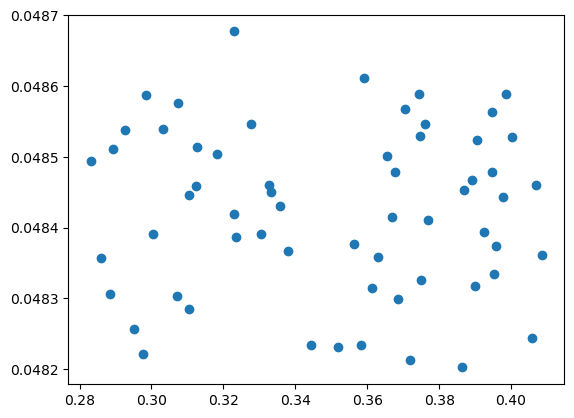

In [147]:
#plt.scatter(results_df["alpha"], results_df["score"]*-1)
plt.scatter(top_ten_df["alpha"], top_ten_df["score"]*-1)

plt.show()

In [156]:
top_ten_df["beta"].mean()

0.16407017794843223

In [157]:
top_ten_df["beta"].std()

0.037542087295965594

In [161]:
top_ten_df["topK"].mean() - top_ten_df["topK"].std()

26.184135602863535

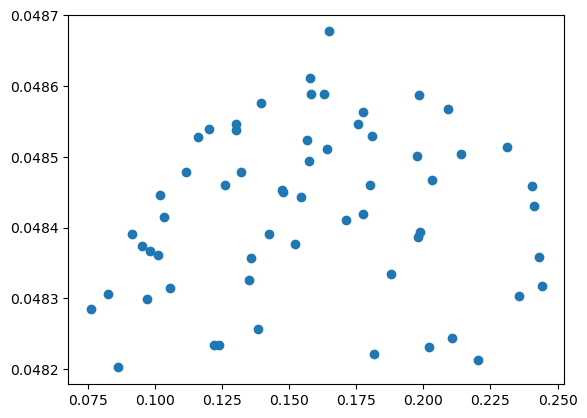

In [148]:
#plt.scatter(results_df["beta"], results_df["score"]*-1)
plt.scatter(top_ten_df["beta"], top_ten_df["score"]*-1)

plt.show()

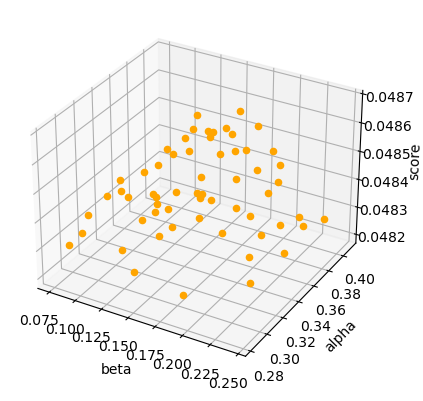

In [150]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for index, row in results_df.iterrows():
    xs = row["beta"]
    ys = row["alpha"]
    zs = row["score"]*-1
    #ax.scatter(xs, ys, zs, color = 'hotpink')

for index, row in top_ten_df.iterrows():
    xs = row["beta"]
    ys = row["alpha"]
    zs = row["score"]*-1
    ax.scatter(xs, ys, zs, color = 'orange')



ax.set_xlabel('beta')
ax.set_ylabel('alpha')
ax.set_zlabel('score')

plt.show()

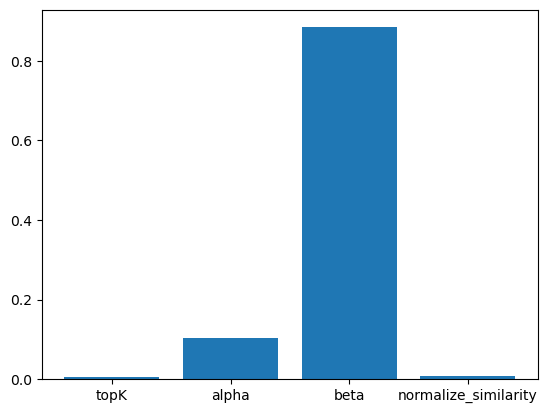

In [54]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


regr = RandomForestRegressor(max_depth=2)

result_df_graph = results_df.copy()
result_df_graph["score"] *= -1
#result_df_graph = result_df_graph.drop(columns=["l1_ratio"])

numerical_cols = result_df_graph.mean().notna()
numerical_cols = numerical_cols.index[numerical_cols]

numerical_df = result_df_graph[numerical_cols]
numerical_df = (numerical_df - numerical_df.mean())/(numerical_df.std() +1e-6)

y_train = numerical_df["score"]
X_train = numerical_df.copy()
X_train = X_train.drop(columns=["score"])

regr.fit(X_train, y_train)

plt.bar(X_train.columns, regr.feature_importances_)
plt.show() 